In [1]:
# Loading the Libraries, Preprocessing, and algorithms
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OrdinalEncoder, OneHotEncoder, LabelBinarizer, TargetEncoder

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, confusion_matrix, RocCurveDisplay, recall_score, precision_score, f1_score, roc_curve, roc_auc_score, classification_report, make_scorer, log_loss

from sklearn import metrics
from scipy import stats
from scipy import stats
from scipy.stats import zscore, loguniform
from scipy.stats.mstats import winsorize

sns.set_style("whitegrid")

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', lambda x: '{:.4f}'.format(x))


In [2]:
#train = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
#test = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')
#original_data = pd.read_csv('/kaggle/input/cirrhosis-patient-survival-prediction/cirrhosis.csv')
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
original_data = pd.read_csv('cirrhosis.csv')
id = test['id']
train.drop('id', inplace=True, axis=1)
test.drop('id', inplace=True, axis=1)
original_data.drop('ID', inplace=True, axis=1)



In [3]:
print('The shape of train dataset is:', train.shape)
print('The shape of test dataset is:', test.shape)
print('The shape of original dataset is:', original_data.shape)

print('===================================================================================')

print('TRAIN')
print(train.info(show_counts=True))
print('===================================================================================')
print('TEST')
print(test.info(show_counts=True))
print('===================================================================================')
print('ORIGINAL DATA')
print(original_data.info(show_counts=True))

print('===================================================================================')

print('There are', train.duplicated().sum(), 'duplicates in the train set')
print('There are', test. duplicated().sum(), 'duplicates in the test set')
print('There are', original_data.duplicated().sum(), 'duplicates in the original set')

print('===================================================================================')

print('TRAIN')
print('Missing Values')
print(train.isnull().sum())
print('===================================================================================')

print('TEST')
print('Missing Values')
print(test.isnull().sum())
print('===================================================================================')

print('ORIGINAL DATA')
print('Missing Values')
print(original_data.isnull().sum())
print('===================================================================================')


The shape of train dataset is: (7905, 19)
The shape of test dataset is: (5271, 18)
The shape of original dataset is: (418, 19)
TRAIN
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7905 entries, 0 to 7904
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         7905 non-null   int64  
 1   Drug           7905 non-null   object 
 2   Age            7905 non-null   int64  
 3   Sex            7905 non-null   object 
 4   Ascites        7905 non-null   object 
 5   Hepatomegaly   7905 non-null   object 
 6   Spiders        7905 non-null   object 
 7   Edema          7905 non-null   object 
 8   Bilirubin      7905 non-null   float64
 9   Cholesterol    7905 non-null   float64
 10  Albumin        7905 non-null   float64
 11  Copper         7905 non-null   float64
 12  Alk_Phos       7905 non-null   float64
 13  SGOT           7905 non-null   float64
 14  Tryglicerides  7905 non-null   float64
 15  Platele

In [4]:
# Concating our train and original dataset
df = pd.concat([train, original_data], ignore_index=True)

print(df.shape)

(8323, 19)


In [5]:
df.dtypes

N_Days             int64
Drug              object
Age                int64
Sex               object
Ascites           object
Hepatomegaly      object
Spiders           object
Edema             object
Bilirubin        float64
Cholesterol      float64
Albumin          float64
Copper           float64
Alk_Phos         float64
SGOT             float64
Tryglicerides    float64
Platelets        float64
Prothrombin      float64
Stage            float64
Status            object
dtype: object

In [6]:
target = 'Status'
numerical_col = [c for c in df.select_dtypes(exclude=['object']).columns if c !=target]
categorical_col = [c for c in df.select_dtypes(include=['object']).columns if c !=target]

In [7]:
print('Numerical Columns: ', numerical_col)

print('Categorical Columns: ', categorical_col)

Numerical Columns:  ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage']
Categorical Columns:  ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema']


In [8]:
train_unique_number = []
for i in df.columns:
    x= df[i].value_counts().count()
    train_unique_number.append(x)
df_unique = pd.DataFrame(train_unique_number, columns=['Unique Number'], index = df.columns)
df_unique

test_unique_number = []
for j in test.columns:
    y = df[j].value_counts().count()
    test_unique_number.append(y)
test_unique = pd.DataFrame(test_unique_number, columns=['Unique Number'], index=test.columns)
test_unique

,Unique Number
N_Days,495
Drug,2
Age,397
Sex,2
Ascites,2
Hepatomegaly,2
Spiders,2
Edema,3
Bilirubin,117
Cholesterol,227


In [9]:
df_unique


,Unique Number
N_Days,495
Drug,2
Age,397
Sex,2
Ascites,2
Hepatomegaly,2
Spiders,2
Edema,3
Bilirubin,117
Cholesterol,227


In [10]:
test_unique

,Unique Number
N_Days,495
Drug,2
Age,397
Sex,2
Ascites,2
Hepatomegaly,2
Spiders,2
Edema,3
Bilirubin,117
Cholesterol,227


In [11]:
for col in list (df.columns):
    print('\nfor columns', col, '\n')
    print(df[col].value_counts())


for columns N_Days 

N_Days
1216    119
1434    107
769      84
3445     75
1765     65
       ... 
1436      1
2115      1
1381      1
2341      1
976       1
Name: count, Length: 495, dtype: int64

for columns Drug 

Drug
Placebo            4164
D-penicillamine    4053
Name: count, dtype: int64

for columns Age 

Age
22369    80
22388    72
20684    72
19060    71
16279    68
         ..
23257     1
11577     1
20990     1
18217     1
12784     1
Name: count, Length: 397, dtype: int64

for columns Sex 

Sex
F    7710
M     613
Name: count, dtype: int64

for columns Ascites 

Ascites
N    7813
Y     404
Name: count, dtype: int64

for columns Hepatomegaly 

Hepatomegaly
Y    4202
N    4015
Name: count, dtype: int64

for columns Spiders 

Spiders
N    6188
Y    2029
Name: count, dtype: int64

for columns Edema 

Edema
N    7515
S     443
Y     365
Name: count, dtype: int64

for columns Bilirubin 

Bilirubin
0.6000     878
0.7000     686
0.8000     636
0.9000     627
0.5000     575
    

In [12]:
for col in list(df.columns):
    print('\nfor columns', col, '\n' )
    print(df[col].unique())


for columns N_Days 

[ 999 2574 3428 2576  788  703 1300 1615 2050 2615 3581 1614 1847 1153
  904 1212 1967 1592 1481 3358 3092  326 2363 1152 3577  799 1832 4467
 2301  943 1882 3244 3090  850 2168 1786 1455  334 1363 3170 4032 2835
 1434 3913  994 1666 3820 1149  930 2157 2555 1776 4050   51 3445 1765
 3458  552 2769 4453 2504  980  853  786 3395 2357  549 1447  732  597
  708 2105 1295 2419 3098  769 1083 1785 1657 1418  737 1701 2598 2891
 1234 3933 1271 3099 1831 3707  191 2318 1321 1420  794 1690 3672  837
 1349 2556 4523 1170 1191 1367 1412 4509 2294 2976 1303 1250 2255 1293
 3149 1433 2583 3086 2297 1908 1000 2224 4190 4500 1978 2386 2624 4079
 1568 3422 4365 3336 1576 2990  762 1951 3839  974 2403 1649 2022 1770
 3297 1569 1297 2713 1282   77 1197 4039 1302  304 1487 2365 2170  321
 1725  971 1077 3468 2350 1677 1216  385 2657 1945 1408 1444 1702 1030
  179 1360 1525 1682  877  890 1165 2330 1783  939  216 4556  735 2449
 1932 3574 3853  223 3282 1012 2452 1067  264 3255   71

In [13]:
df.isnull().sum()

N_Days             0
Drug             106
Age                0
Sex                0
Ascites          106
Hepatomegaly     106
Spiders          106
Edema              0
Bilirubin          0
Cholesterol      134
Albumin            0
Copper           108
Alk_Phos         106
SGOT             106
Tryglicerides    136
Platelets         11
Prothrombin        2
Stage              6
Status             0
dtype: int64

# Handling missing data

In [14]:
df.isnull().mean()*100

N_Days          0.0000
Drug            1.2736
Age             0.0000
Sex             0.0000
Ascites         1.2736
Hepatomegaly    1.2736
Spiders         1.2736
Edema           0.0000
Bilirubin       0.0000
Cholesterol     1.6100
Albumin         0.0000
Copper          1.2976
Alk_Phos        1.2736
SGOT            1.2736
Tryglicerides   1.6340
Platelets       0.1322
Prothrombin     0.0240
Stage           0.0721
Status          0.0000
dtype: float64

In [15]:
Missing_features = df
for feature in train:
    if feature=='Age':
        fill = df[feature].mean()
    else:
        fill = df[feature].value_counts().index[0]
    df[feature] = df[feature].fillna(fill)
   

In [16]:
df.isnull().sum()

N_Days           0
Drug             0
Age              0
Sex              0
Ascites          0
Hepatomegaly     0
Spiders          0
Edema            0
Bilirubin        0
Cholesterol      0
Albumin          0
Copper           0
Alk_Phos         0
SGOT             0
Tryglicerides    0
Platelets        0
Prothrombin      0
Stage            0
Status           0
dtype: int64

# Visualization

In [17]:
df.head()

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage,Status
0,999,D-penicillamine,21532,M,N,N,N,N,2.3000,316.0000,3.3500,172.0000,1601.0000,179.8000,63.0000,394.0000,9.7000,3.0000,D
1,2574,Placebo,19237,F,N,N,N,N,0.9000,364.0000,3.5400,63.0000,1440.0000,134.8500,88.0000,361.0000,11.0000,3.0000,C
2,3428,Placebo,13727,F,N,Y,Y,Y,3.3000,299.0000,3.5500,131.0000,1029.0000,119.3500,50.0000,199.0000,11.7000,4.0000,D
3,2576,Placebo,18460,F,N,N,N,N,0.6000,256.0000,3.5000,58.0000,1653.0000,71.3000,96.0000,269.0000,10.7000,3.0000,C
4,788,Placebo,16658,F,N,Y,N,N,1.1000,346.0000,3.6500,63.0000,1181.0000,125.5500,96.0000,298.0000,10.6000,4.0000,C


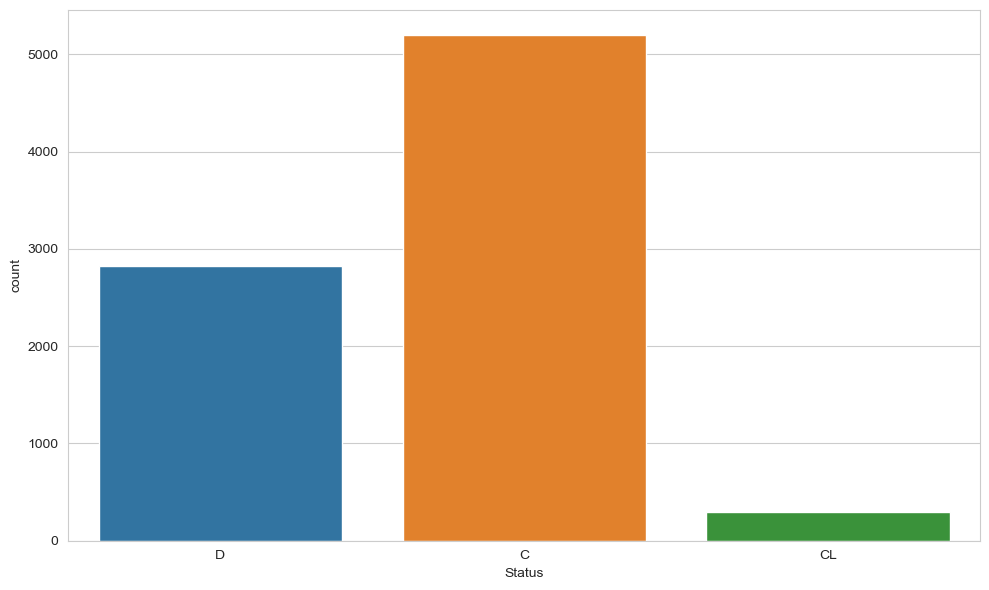

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(df, x=df.Status)
plt.tight_layout()
plt.show()

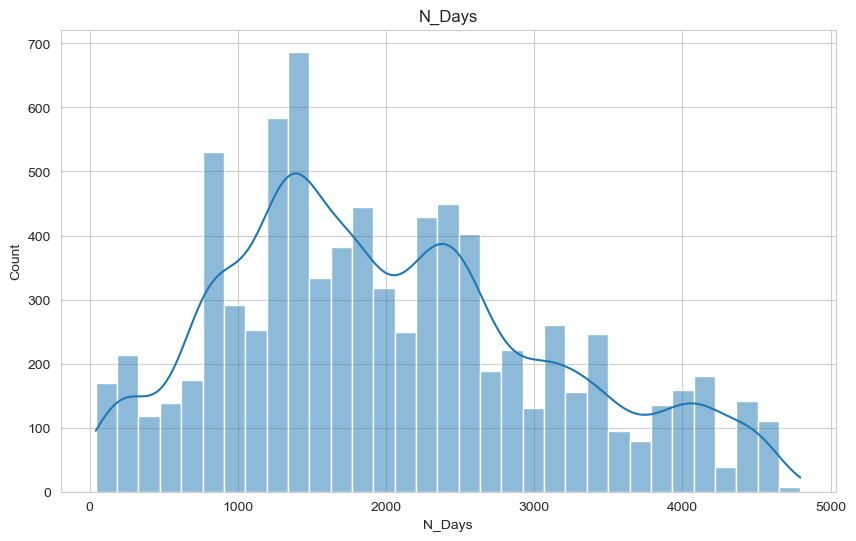

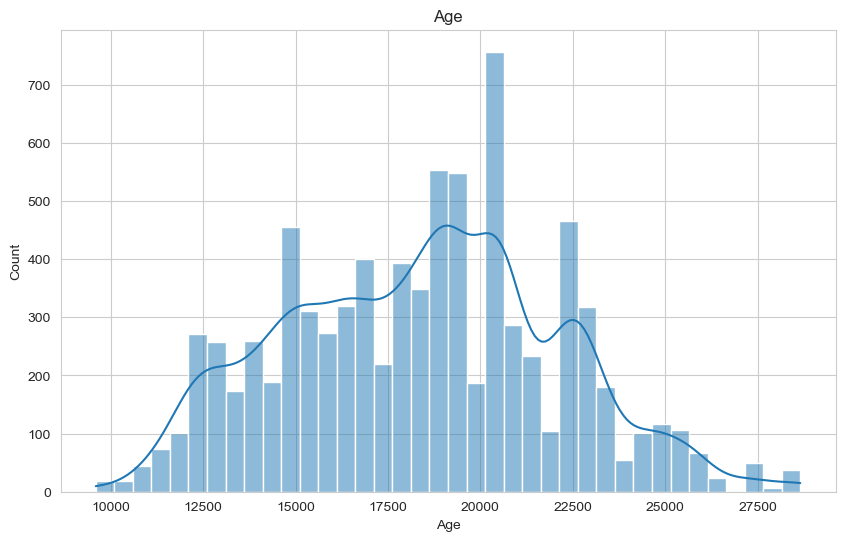

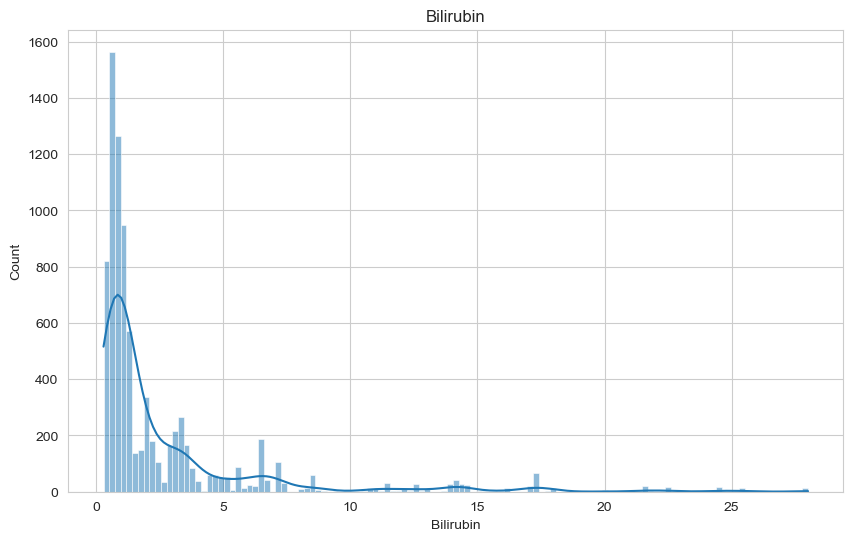

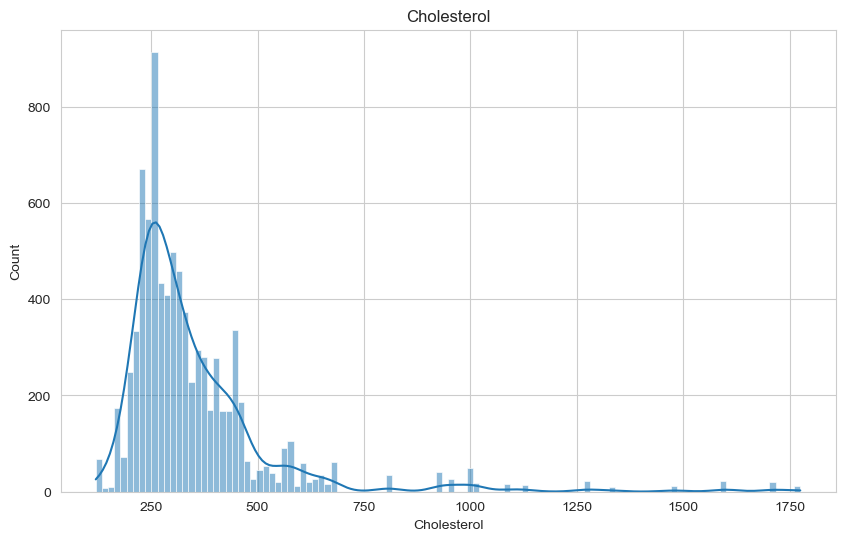

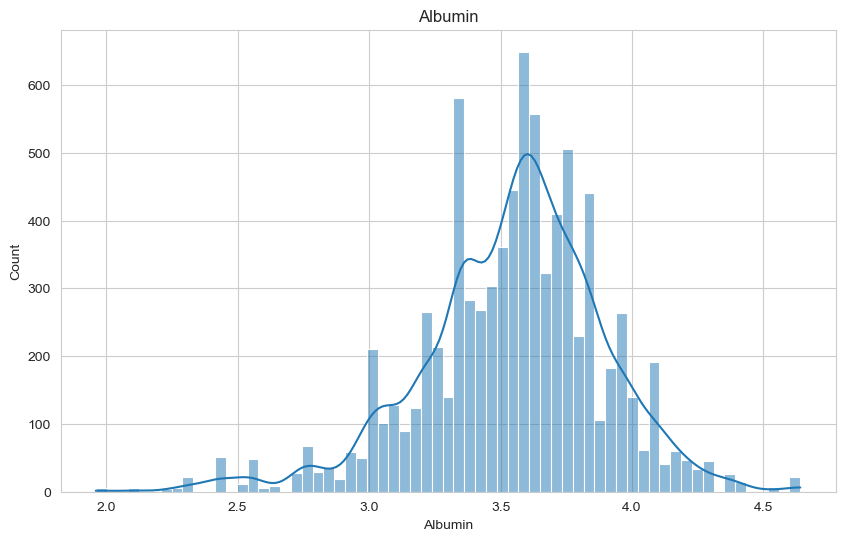

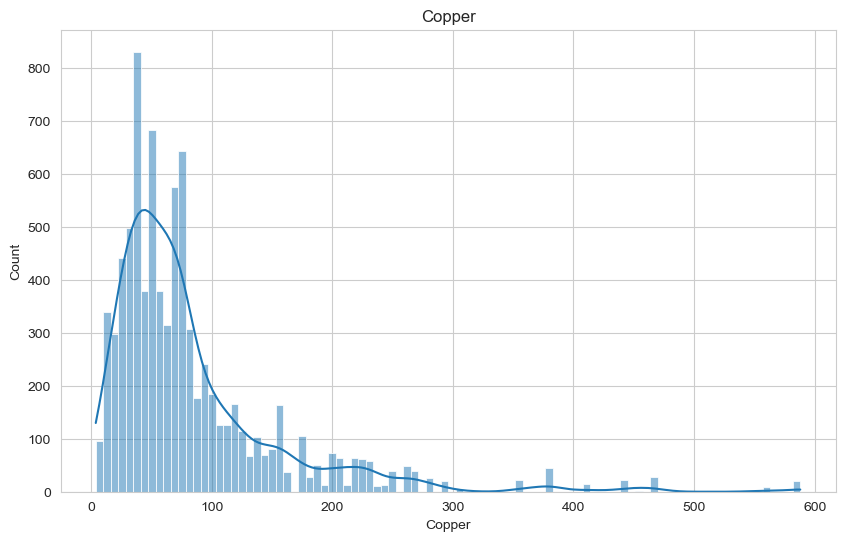

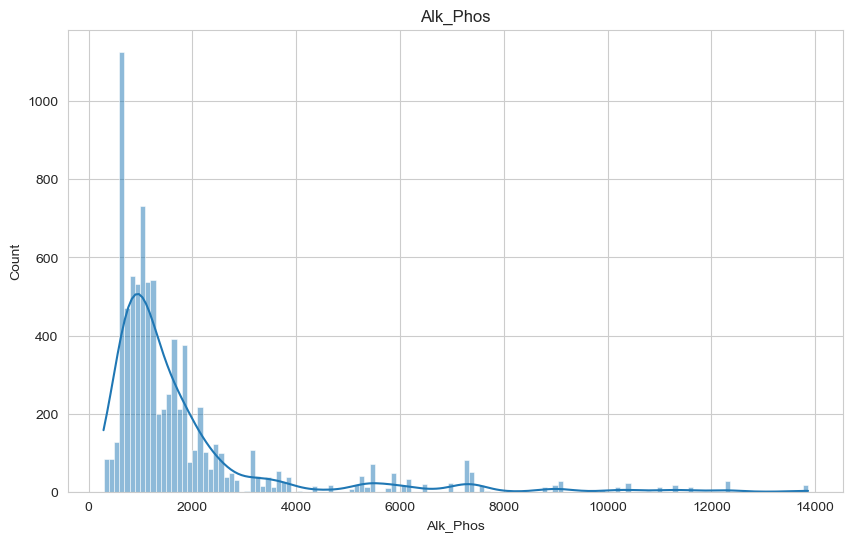

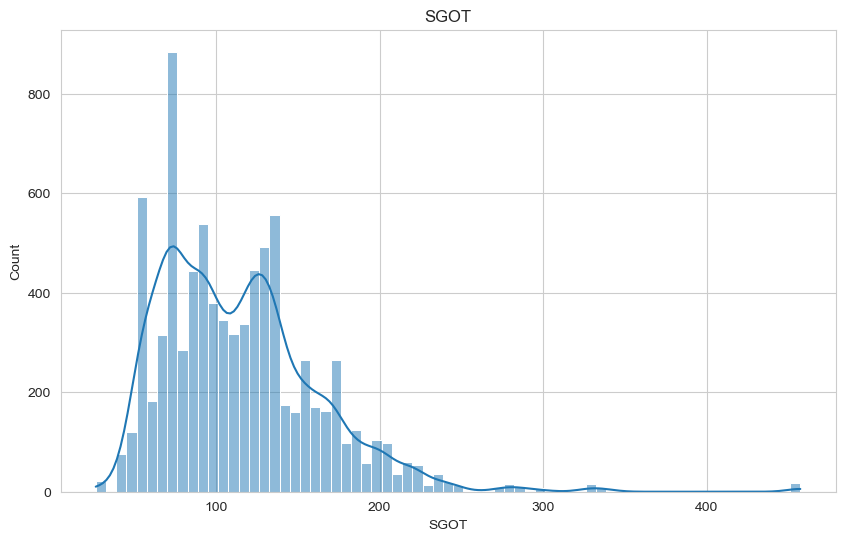

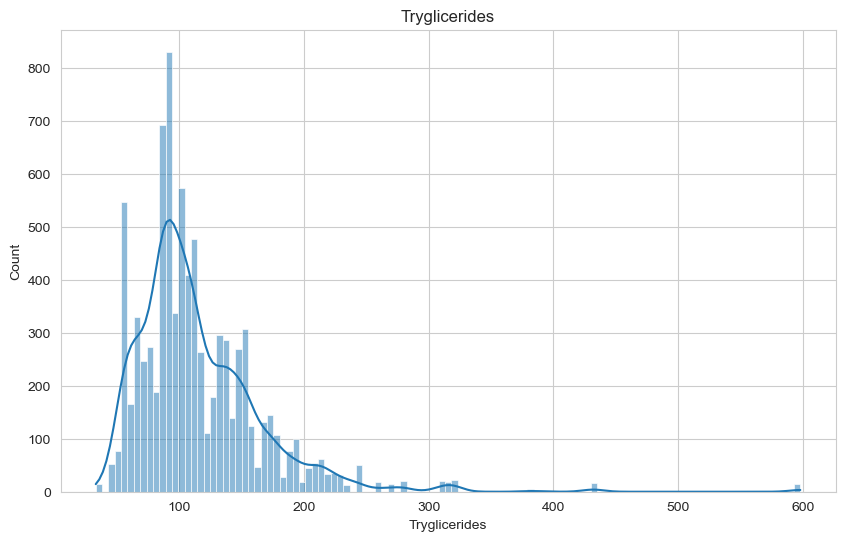

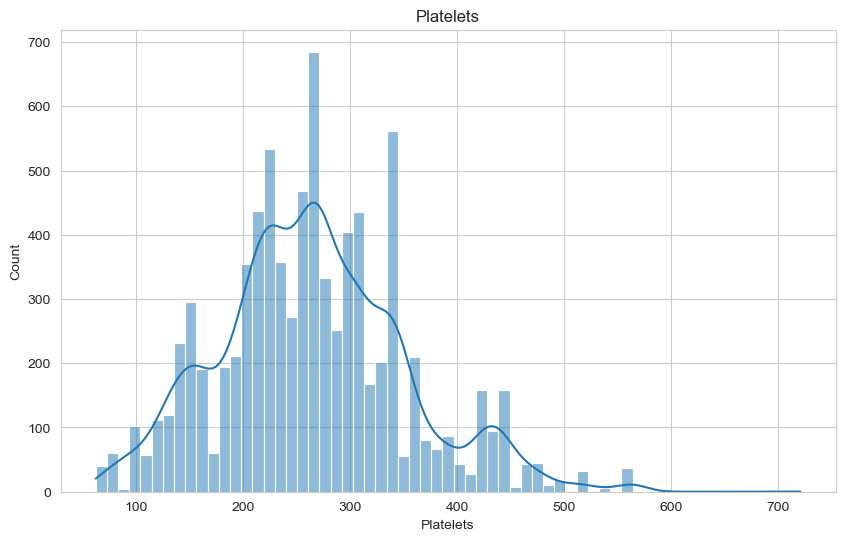

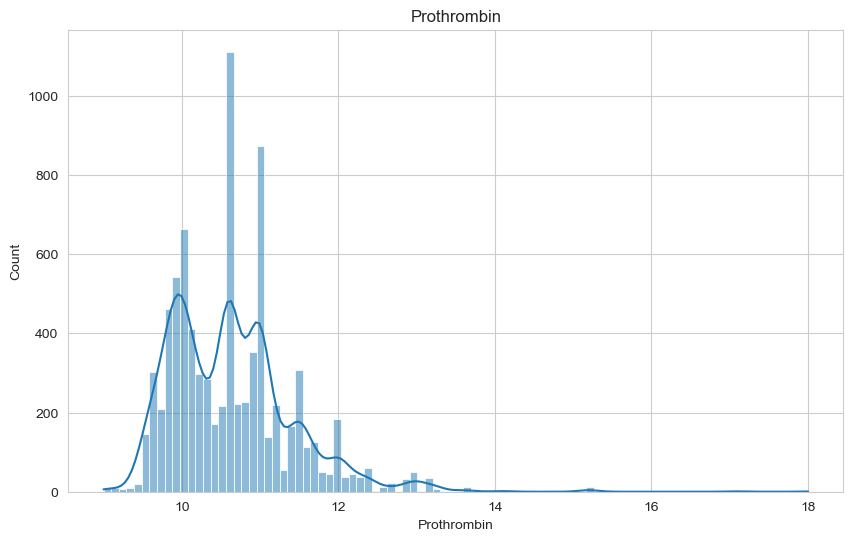

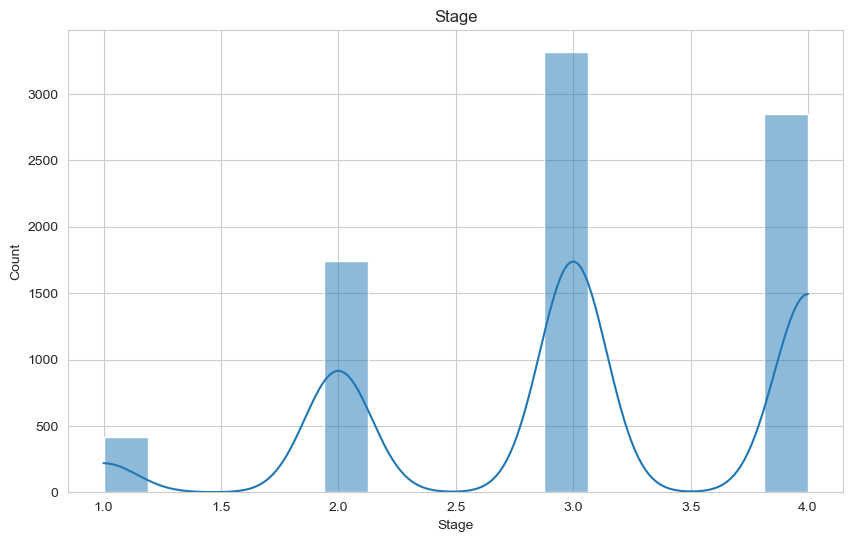

In [19]:
for i in list(df[numerical_col]):
    plt.figure(figsize=(10,6))
    sns.histplot(data=df[i], kde=True)
    plt.title(i)
    plt.show()

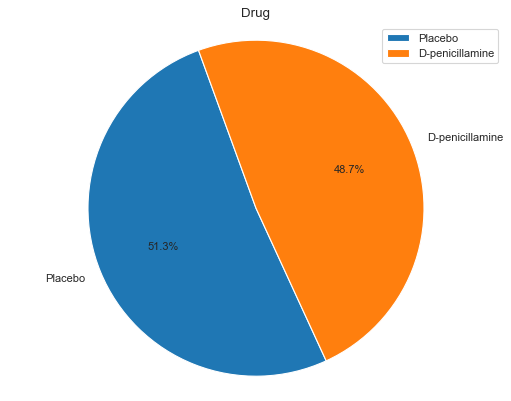

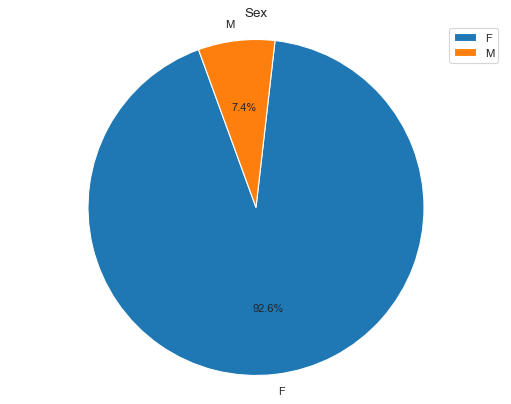

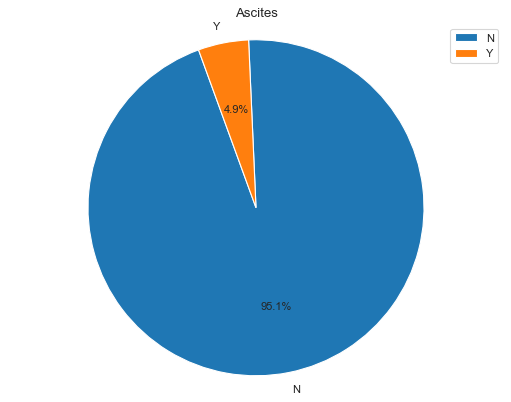

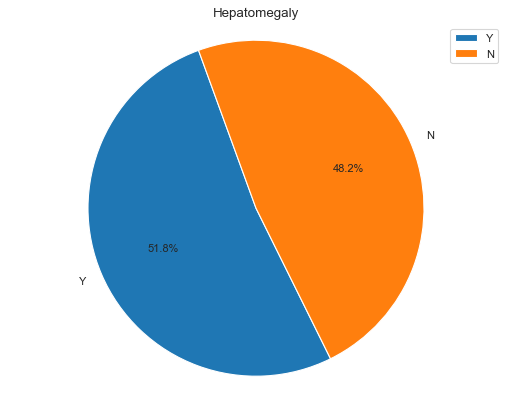

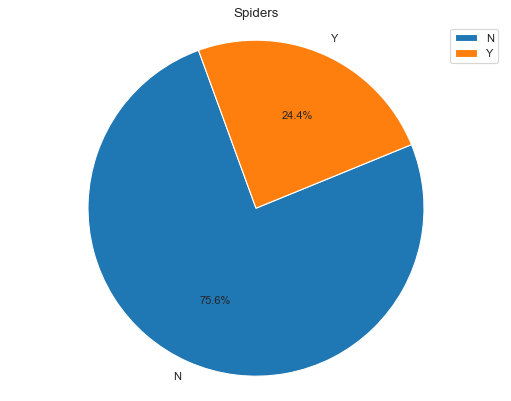

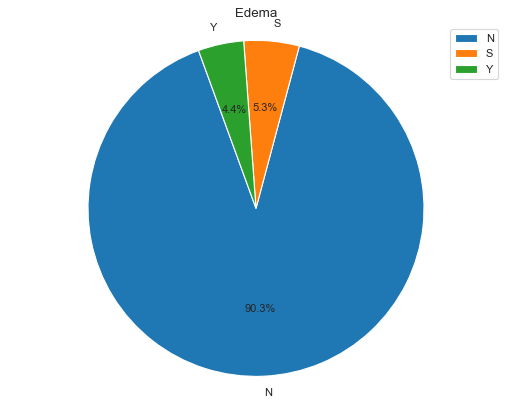

In [20]:
for i in list(categorical_col):
    fig,ax = plt.subplots(figsize=(8,6),dpi=80)
    
    observation_values=list(df[i].value_counts().index)
    total_observation = list(df[i].value_counts())
    
    ax.pie(total_observation,labels=observation_values, autopct='%1.1f%%',startangle=110, labeldistance=1.1)
    ax.axis('equal')
    
    plt.title((i))
    plt.legend()
    plt.show()

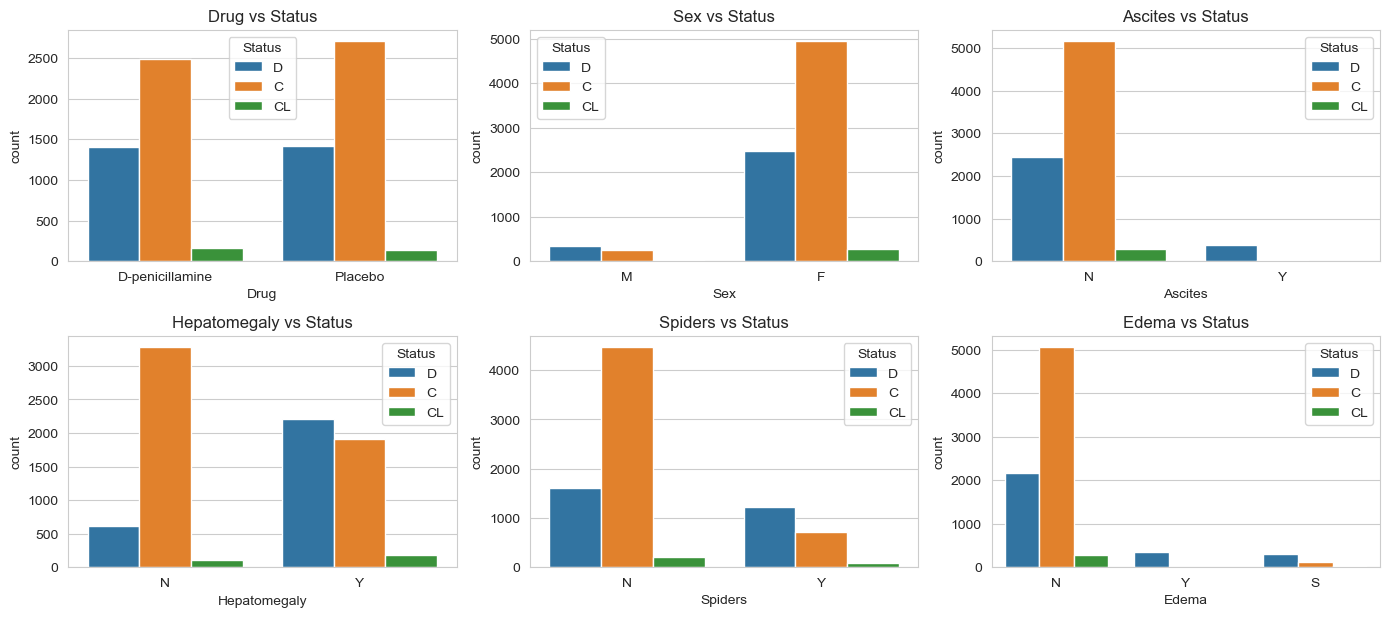

In [21]:
plt.figure(figsize=(14, len(categorical_col) * 2))
for i, col in enumerate(categorical_col):
    plt.subplot(len(categorical_col) // 2 + 1, 3, i + 1)
    sns.countplot(x=col, hue=target, data=df)
    plt.title(f"{col} vs {target}")
    plt.tight_layout()

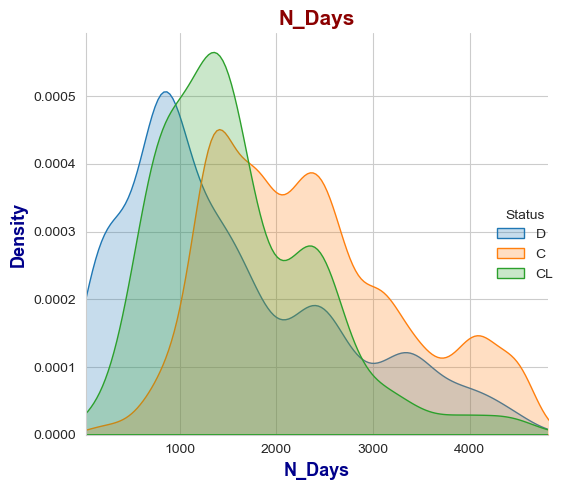

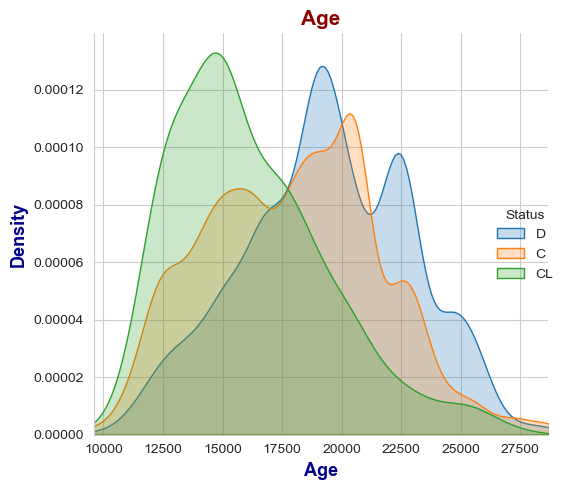

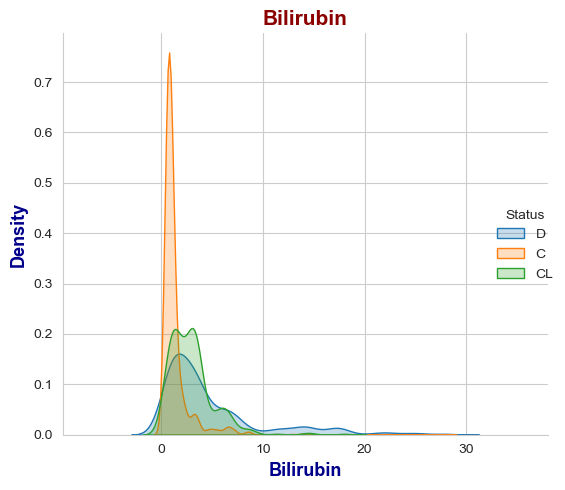

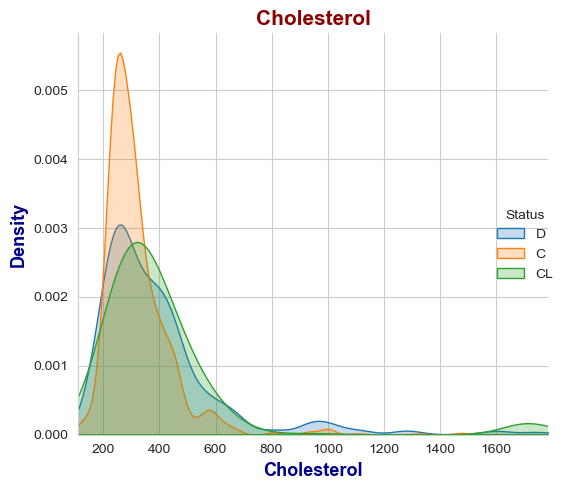

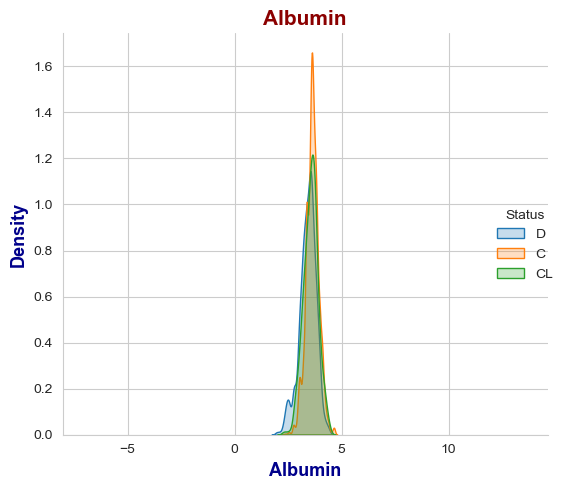

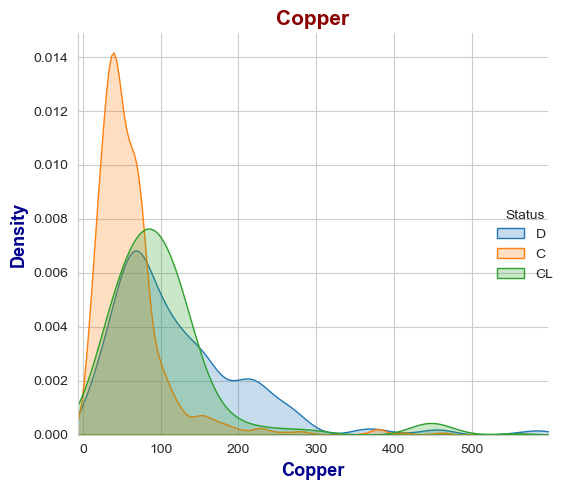

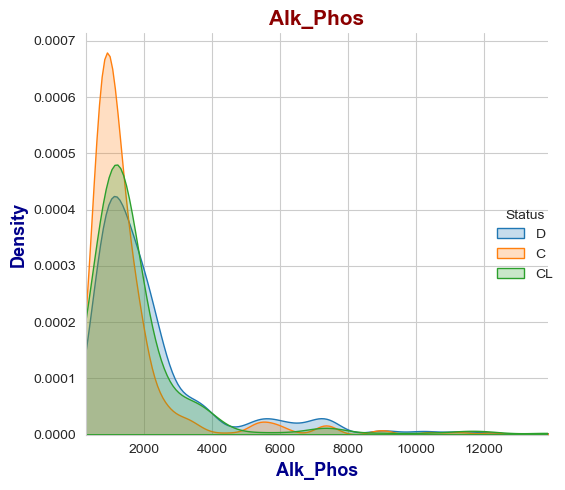

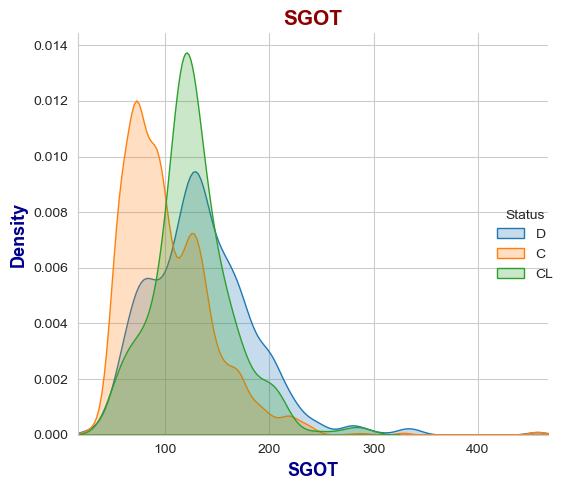

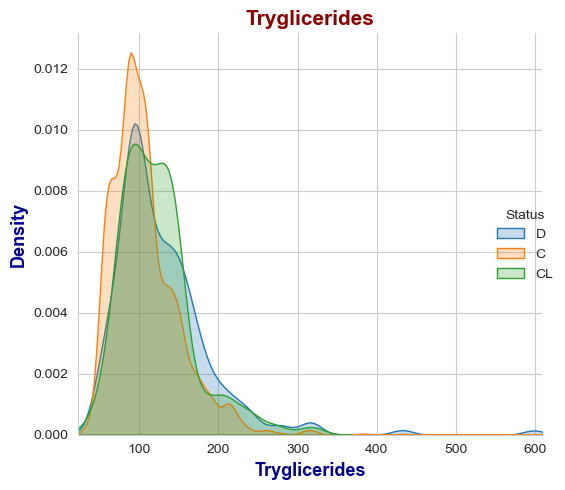

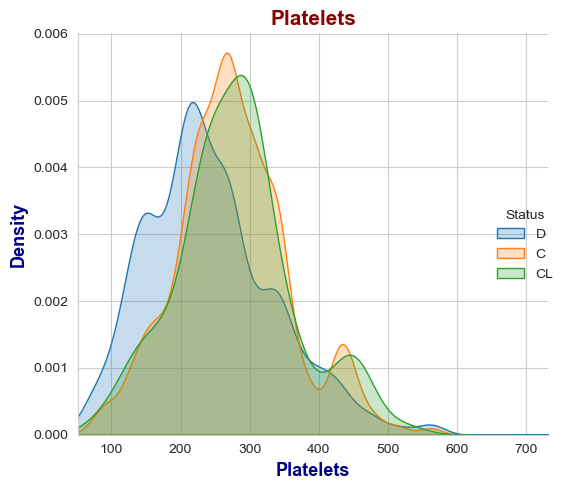

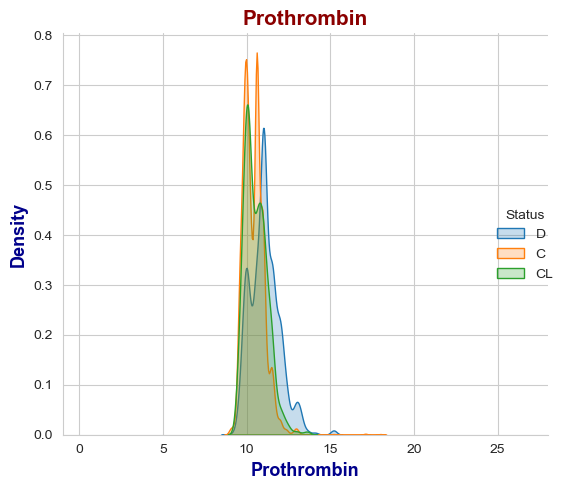

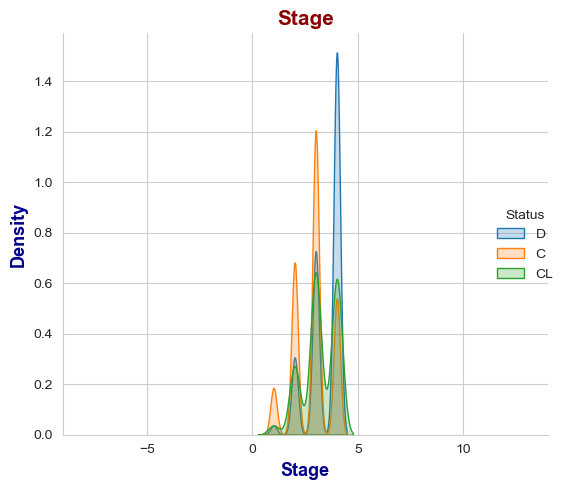

In [22]:
title_font={'family': 'arial', 'color': 'darkred', 'weight': 'bold', 'size': 15}
axis_font={'family': 'arial', 'color': 'darkblue', 'weight': 'bold', 'size': 13}

for i in list(numerical_col):
    graph = sns.FacetGrid(df, hue='Status',height=5, xlim=((df[i].min() - 10), (df[i].max() + 10)))
    graph.map(sns.kdeplot, i, shade=True)
    graph.add_legend()

    
    plt.title(i,fontdict=title_font)
    plt.xlabel(i,fontdict=axis_font)
    plt.ylabel('Density',fontdict=axis_font)
    
    plt.tight_layout()
    plt.show()
    
    

graph=sns.pairplot(df[numerical_col],diag_kind='kde')
graph.map_lower(sns.kdeplot,levels=4, color='.2')
plt.show()

# Preprocessing

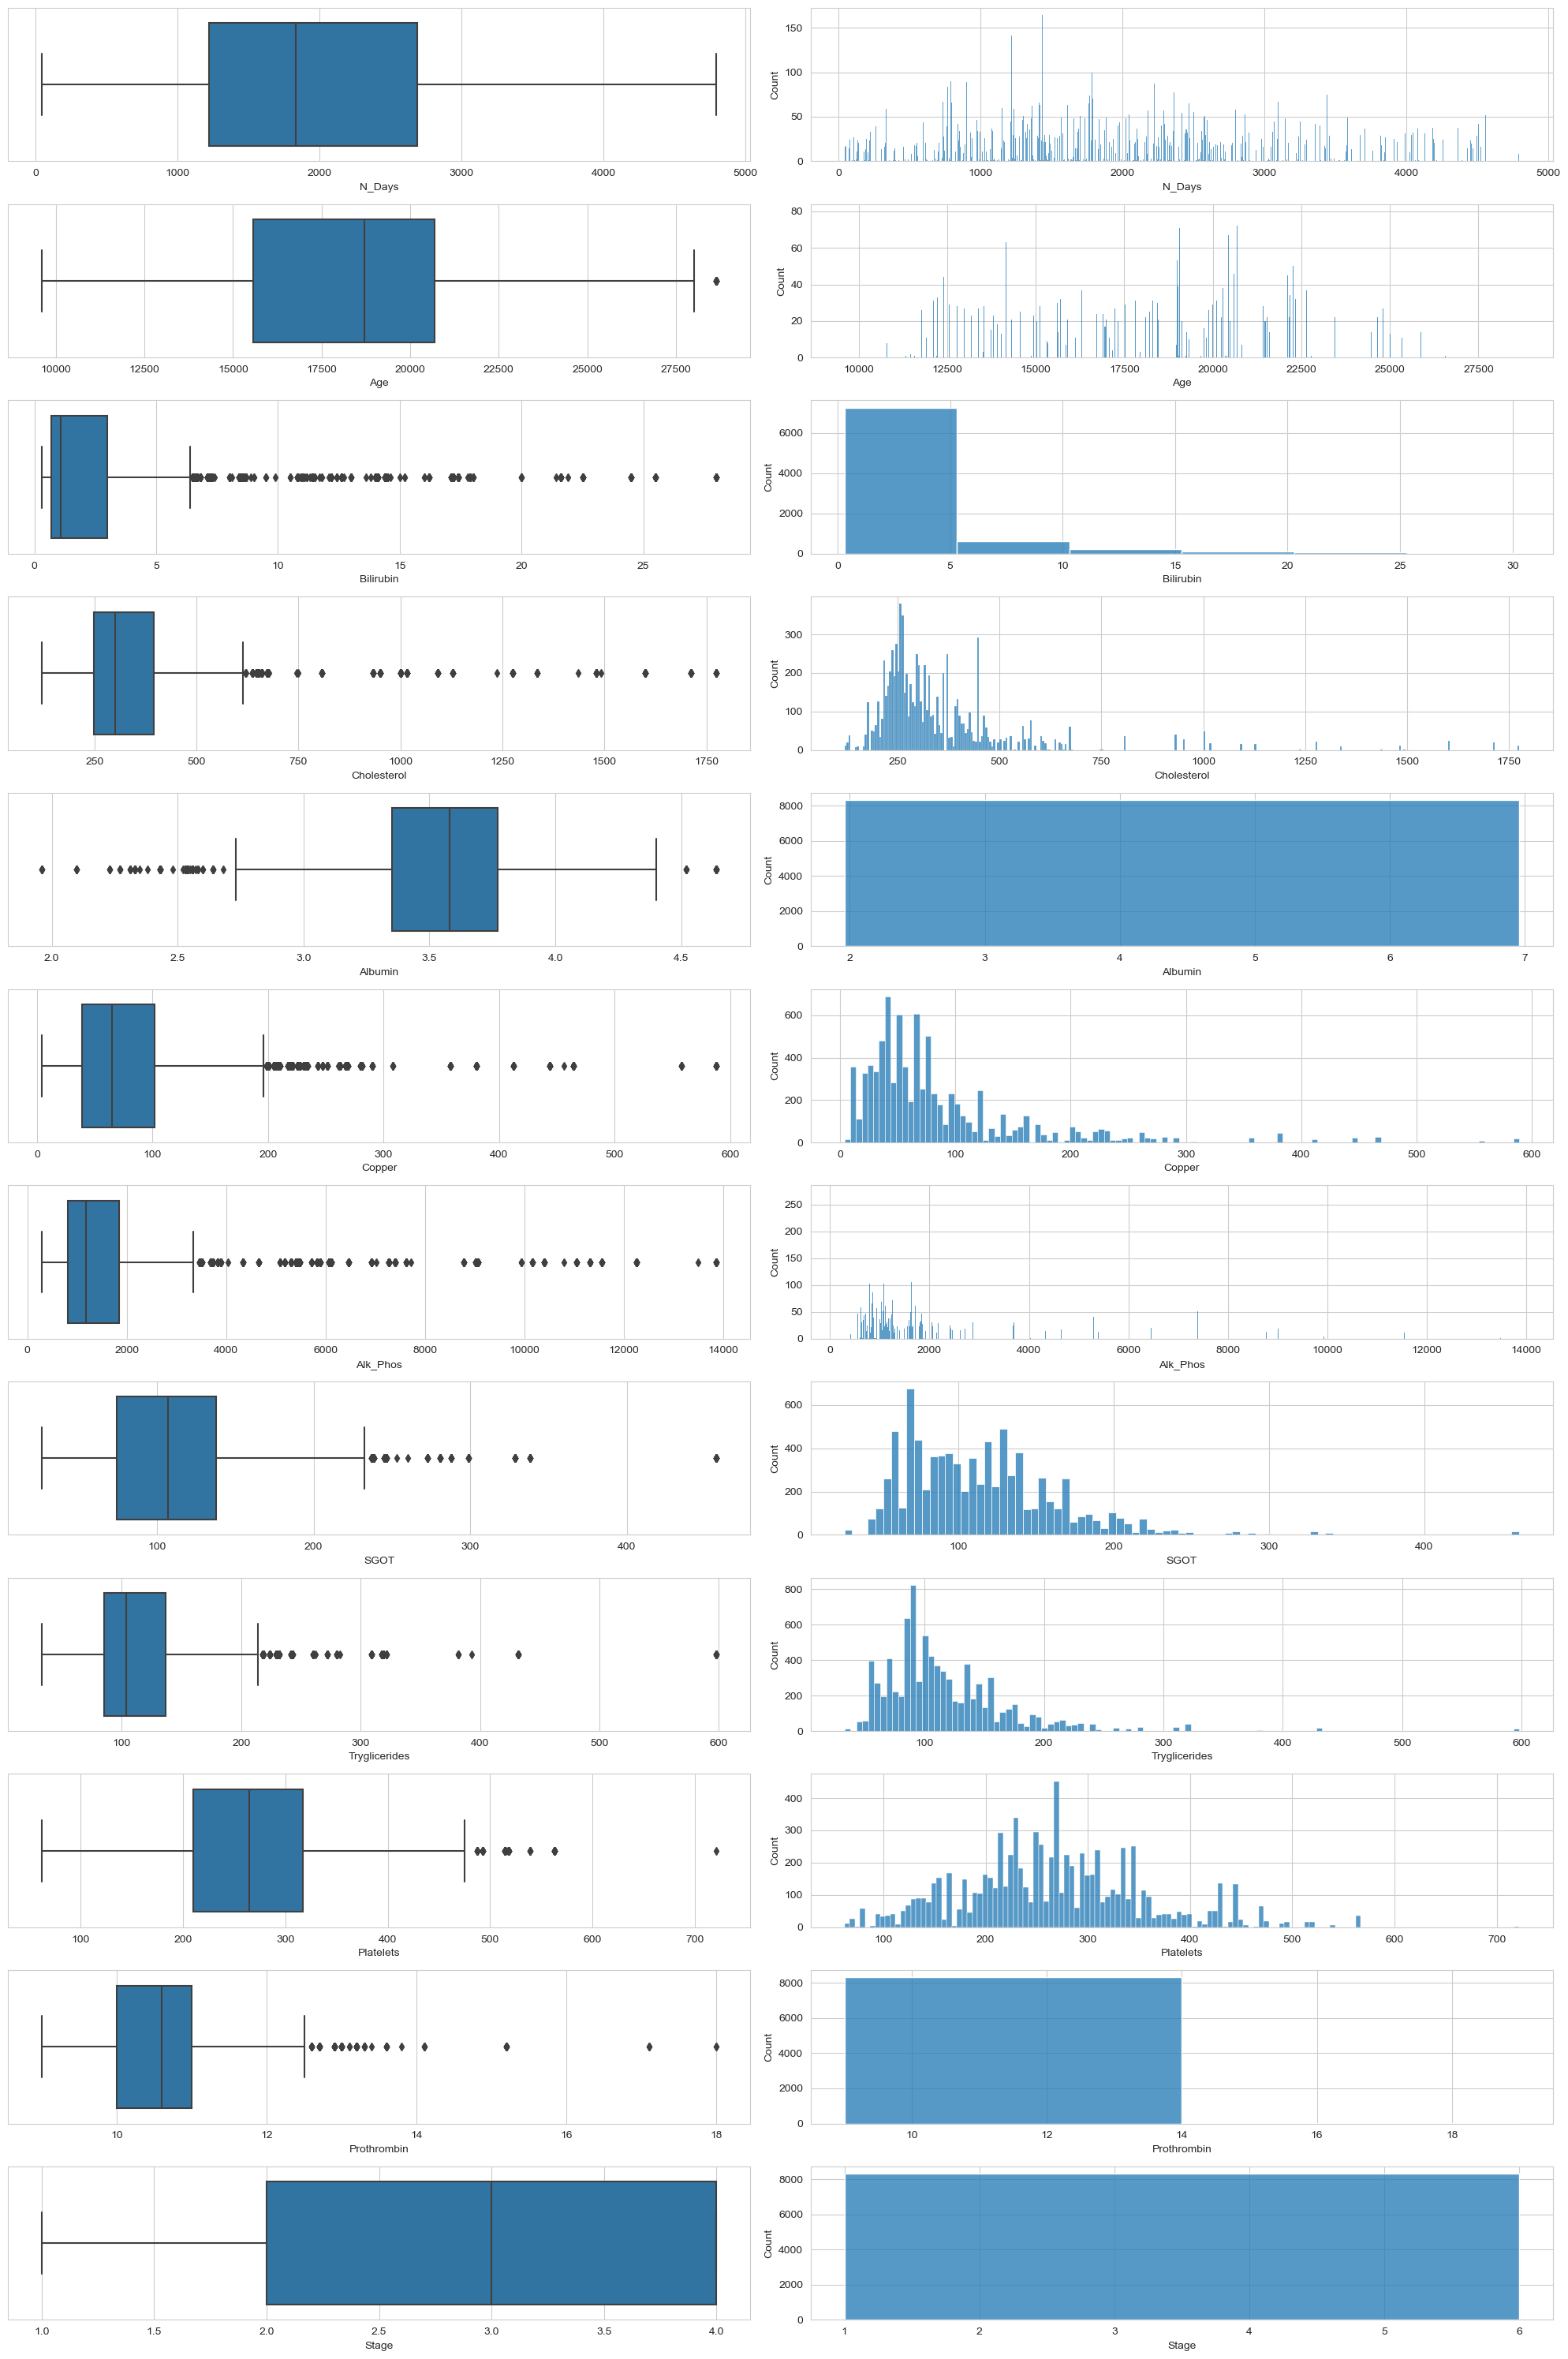

In [23]:
fig, axes = plt.subplots(12,2, figsize=(20,30))
a = 0;
b = 0;
count= numerical_col
for col in count:
    ax = sns.boxplot(x=df[col], ax=axes[a][b])
    b += 1
    ax = sns.histplot(df, x=col, binwidth = 5,ax=axes[a][b])
    a += 1
    b -= 1
plt.tight_layout()

In [24]:
df_copy = df.copy()

In [25]:
zscore_Bilirubin = zscore(df_copy['Bilirubin'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Bilirubin>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 846
--------------
Threshold Value: 2
Number of Outliers: 453
--------------
Threshold Value: 3
Number of Outliers: 259
--------------


In [26]:
df_copy[zscore_Bilirubin>1].Bilirubin.min()

6.5

In [27]:
df_copy[df_copy['Bilirubin']<6.5].Bilirubin.max()

6.4

In [28]:
winsorize_percentile_Bilirubin=stats.percentileofscore(df_copy['Bilirubin'],6.4)/100
print(winsorize_percentile_Bilirubin)

0.8943289679202211


In [29]:
1-winsorize_percentile_Bilirubin

0.1056710320797789

In [30]:
Bilirubin_winsorize=winsorize(df_copy.Bilirubin,(0, (1-winsorize_percentile_Bilirubin)))

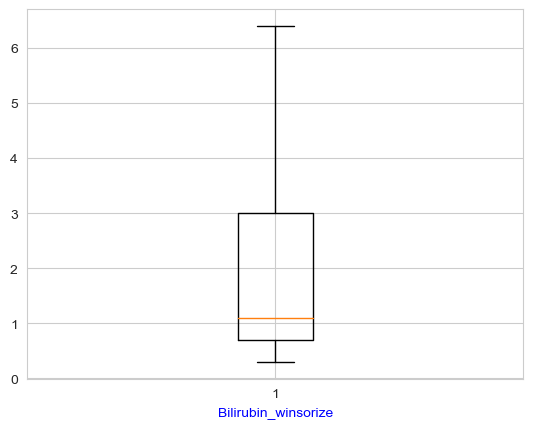

In [31]:
plt.boxplot(Bilirubin_winsorize)
plt.xlabel('Bilirubin_winsorize',color='b')
plt.show()

In [32]:
df_copy['Bilirubin_win'] = Bilirubin_winsorize

In [33]:
zscore_Platelets= zscore(df_copy['Platelets'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Platelets>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 1153
--------------
Threshold Value: 2
Number of Outliers: 358
--------------
Threshold Value: 3
Number of Outliers: 44
--------------


In [34]:
df_copy[zscore_Platelets>2].Platelets.min()

441.0

In [35]:
df_copy[df_copy['Platelets']<441.0].Platelets.max()

439.0

In [36]:
winsorize_percentile_Platelets=stats.percentileofscore(df_copy['Platelets'],439)/100
print(winsorize_percentile_Platelets)

0.9569866634626937


In [37]:
1-winsorize_percentile_Platelets

0.043013336537306324

In [38]:
Platelets_winsorize=winsorize(df_copy.Platelets,(0, (1-winsorize_percentile_Platelets)))

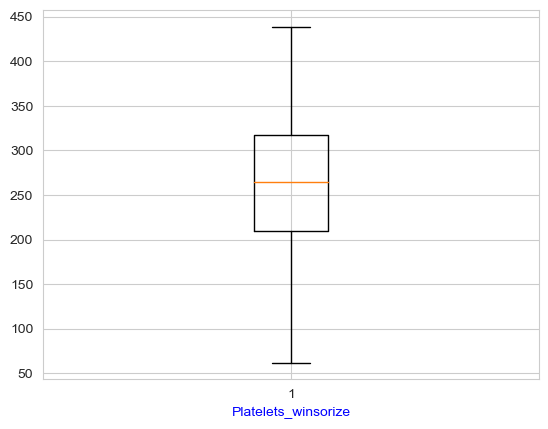

In [39]:
plt.boxplot(Platelets_winsorize)
plt.xlabel('Platelets_winsorize',color='b')
plt.show()

In [40]:
df_copy['Platelets_win'] = Platelets_winsorize

In [41]:
zscore_SGOT= zscore(df_copy['SGOT'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_SGOT>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 1225
--------------
Threshold Value: 2
Number of Outliers: 284
--------------
Threshold Value: 3
Number of Outliers: 87
--------------


In [42]:
df_copy[zscore_SGOT>2].SGOT.min()

214.85

In [43]:
df_copy[df_copy['SGOT']<214.85].SGOT.max()

210.8

In [44]:
winsorize_percentile_SGOT=stats.percentileofscore(df_copy['SGOT'],210.8)/100
print(winsorize_percentile_SGOT)

0.9645560495013816


In [45]:
1-winsorize_percentile_SGOT

0.03544395049861837

In [46]:
SGOT_winsorize=winsorize(df_copy.SGOT,(0, (1-winsorize_percentile_SGOT)))

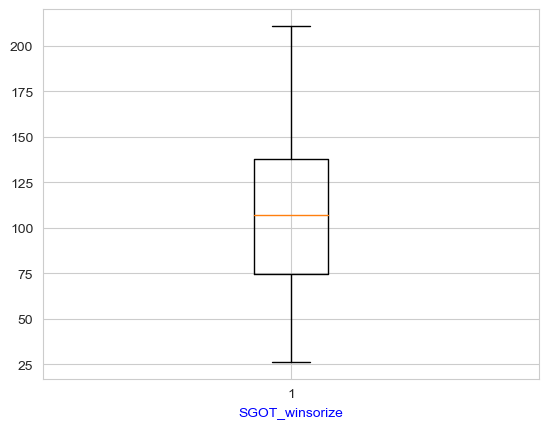

In [47]:
plt.boxplot(SGOT_winsorize)
plt.xlabel('SGOT_winsorize',color='b')
plt.show()

In [48]:
df_copy['SGOT_win'] = SGOT_winsorize

In [49]:
zscore_Copper= zscore(df_copy['Copper'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Copper>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 926
--------------
Threshold Value: 2
Number of Outliers: 351
--------------
Threshold Value: 3
Number of Outliers: 158
--------------


In [50]:
df_copy[zscore_Copper>1].Copper.min()

161.0

In [51]:
df_copy[df_copy['Copper']<161].Copper.max()

159.0

In [52]:
winsorize_percentile_Copper=stats.percentileofscore(df_copy['Copper'],159)/100
print(winsorize_percentile_Copper)

0.8835155592935239


In [53]:
1-winsorize_percentile_Copper

0.11648444070647612

In [54]:
Copper_winsorize=winsorize(df_copy.Copper,(0, (1-winsorize_percentile_Copper)))

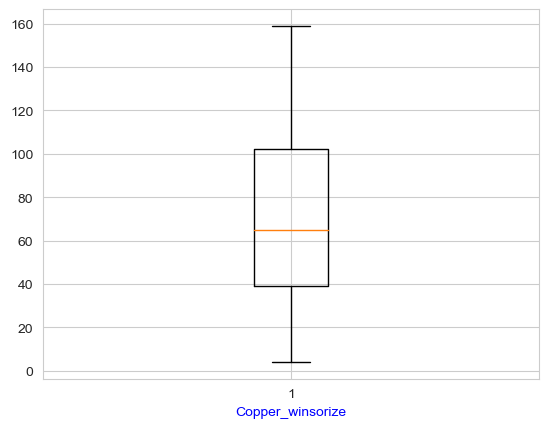

In [55]:
plt.boxplot(Copper_winsorize)
plt.xlabel('Copper_winsorize',color='b')
plt.show()

In [56]:
df_copy['Copper_Win'] = Copper_winsorize

In [57]:
zscore_Cholesterol= zscore(df_copy['Cholesterol'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Cholesterol>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 733
--------------
Threshold Value: 2
Number of Outliers: 304
--------------
Threshold Value: 3
Number of Outliers: 227
--------------


In [58]:
df_copy[zscore_Cholesterol>1].Cholesterol.min()

556.0

In [59]:
df_copy[df_copy['Cholesterol']<556].Cholesterol.max()

546.0

In [60]:
winsorize_percentile_Cholesterol=stats.percentileofscore(df_copy['Cholesterol'],546)/100
print(winsorize_percentile_Cholesterol)

0.9107293043373782


In [61]:
1-winsorize_percentile_Cholesterol

0.0892706956626218

In [62]:
Cholesterol_winsorize=winsorize(df_copy.Cholesterol,(0, (1-winsorize_percentile_Cholesterol)))

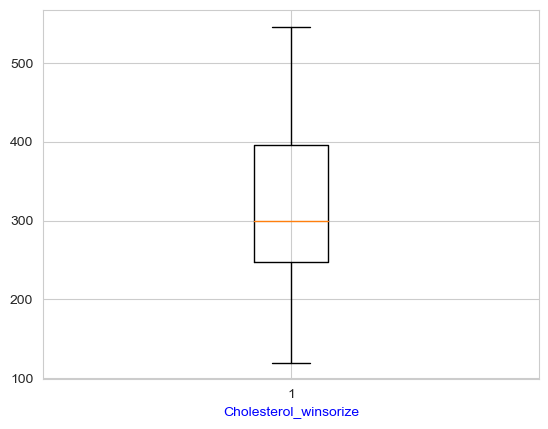

In [63]:
plt.boxplot(Cholesterol_winsorize)
plt.xlabel('Cholesterol_winsorize',color='b')
plt.show()

In [64]:
df_copy['Cholesterol_win'] = Cholesterol_winsorize

In [65]:
zscore_Tryglicerides= zscore(df_copy['Tryglicerides'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Tryglicerides>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 1022
--------------
Threshold Value: 2
Number of Outliers: 285
--------------
Threshold Value: 3
Number of Outliers: 121
--------------


In [66]:
df_copy[zscore_Tryglicerides>1].Tryglicerides.min()

168.0

In [67]:
df_copy[df_copy['Tryglicerides']<168].Tryglicerides.max()

166.0

In [68]:
winsorize_percentile_Tryglicerides=stats.percentileofscore(df_copy['Tryglicerides'],166)/100
print(winsorize_percentile_Tryglicerides)

0.8734230445752733


In [69]:
1-winsorize_percentile_Tryglicerides

0.1265769554247267

In [70]:
Tryglicerides_winsorize=winsorize(df_copy.Tryglicerides,(0, (1-winsorize_percentile_Tryglicerides)))

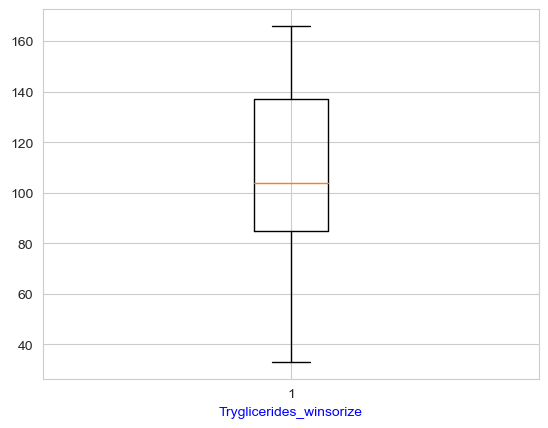

In [71]:
plt.boxplot(Tryglicerides_winsorize)
plt.xlabel('Tryglicerides_winsorize',color='b')
plt.show()

In [72]:
df_copy['Tryglicerides_win'] = Tryglicerides_winsorize

In [73]:
zscore_Alk_Phos= zscore(df_copy['Alk_Phos'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Alk_Phos>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 725
--------------
Threshold Value: 2
Number of Outliers: 484
--------------
Threshold Value: 3
Number of Outliers: 201
--------------


In [74]:
df_copy[zscore_Alk_Phos>1].Alk_Phos.min()

3736.0

In [75]:
df_copy[df_copy['Alk_Phos']<3736].Alk_Phos.max()

3697.4

In [76]:
winsorize_percentile_Alk_Phos=stats.percentileofscore(df_copy['Alk_Phos'],3450)/100
print(winsorize_percentile_Alk_Phos)

0.9003964916496454


In [77]:
Alk_Phos_winsorize=winsorize(df_copy.Alk_Phos,(0, (1-winsorize_percentile_Alk_Phos)))

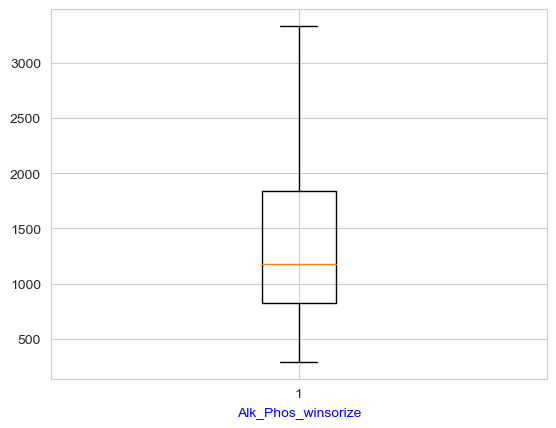

In [78]:
plt.boxplot(Alk_Phos_winsorize)
plt.xlabel('Alk_Phos_winsorize',color='b')
plt.show()

In [79]:
df_copy['Alk_Phos_win'] = Alk_Phos_winsorize

In [80]:
zscore_Age= zscore(df_copy['Age'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Age>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 1572
--------------
Threshold Value: 2
Number of Outliers: 184
--------------
Threshold Value: 3
Number of Outliers: 0
--------------


In [81]:
df_copy[zscore_Age>2].Age.min()

25772

In [82]:
df_copy[df_copy['Age']<25772].Age.max()

25594

In [83]:
winsorize_percentile_Age=stats.percentileofscore(df_copy['Age'],25594)/100
print(winsorize_percentile_Age)

0.9767511714526012


In [84]:
Age_winsorize=winsorize(df_copy.Age,(0, (1-winsorize_percentile_Age)))

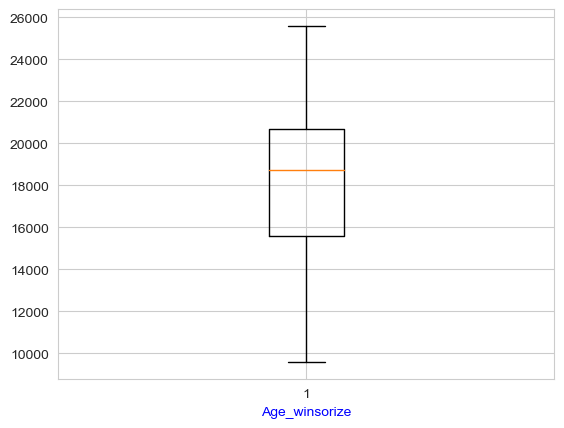

In [85]:
plt.boxplot(Age_winsorize)
plt.xlabel('Age_winsorize',color='b')
plt.show()

In [86]:
df_copy['Age_win'] = Age_winsorize

In [87]:
zscore_Prothrombin= zscore(df_copy['Prothrombin'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Prothrombin>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 1199
--------------
Threshold Value: 2
Number of Outliers: 293
--------------
Threshold Value: 3
Number of Outliers: 80
--------------


In [88]:
df_copy[zscore_Prothrombin>2].Prothrombin.min()

12.3

In [89]:
df_copy[df_copy['Prothrombin']<12.3].Prothrombin.max()

12.2

In [90]:
winsorize_percentile_Prothrombin=stats.percentileofscore(df_copy['Prothrombin'],12.2)/100
print(winsorize_percentile_Prothrombin)

0.9620929953141895


In [91]:
Prothrombin_winsorize=winsorize(df_copy.Prothrombin,(0, (1-winsorize_percentile_Prothrombin)))

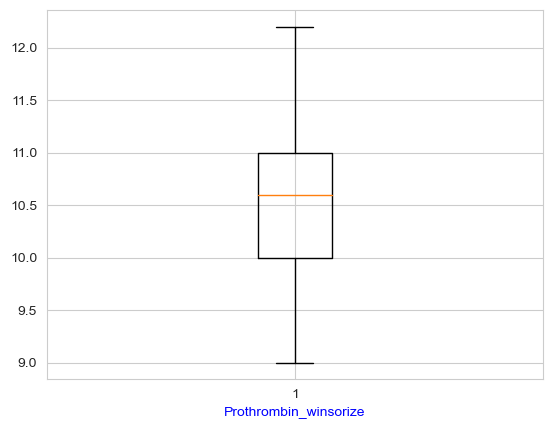

In [92]:
plt.boxplot(Prothrombin_winsorize)
plt.xlabel('Prothrombin_winsorize',color='b')
plt.show()

In [93]:
df_copy['Prothrombin_win'] = Prothrombin_winsorize

In [94]:
def iqr(df,var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3-q1
    lower_v=q1-(1.5*diff)
    upper_v=q3+(1.5*diff)
    return df[(df[var]<lower_v) | (df[var]>upper_v)]

In [95]:
Albumin_out = iqr(df_copy,'Albumin')
Albumin_out

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,...,Status,Bilirubin_win,Platelets_win,SGOT_win,Copper_Win,Cholesterol_win,Tryglicerides_win,Alk_Phos_win,Age_win,Prothrombin_win
216,321,Placebo,15116,F,N,Y,Y,N,3.6000,260.0000,...,D,3.6000,124.0000,121.2600,159.0000,260.0000,158.0000,3336.0000,15116,10.6000
224,3468,Placebo,13918,F,Y,Y,Y,Y,11.5000,178.0000,...,D,6.4000,195.0000,119.3500,138.0000,178.0000,91.0000,1029.0000,13918,11.7000
272,334,D-penicillamine,22388,F,Y,Y,N,Y,14.5000,448.0000,...,D,6.4000,210.0000,134.0000,123.0000,448.0000,155.0000,1833.0000,22388,11.1000
293,223,D-penicillamine,25023,F,Y,Y,Y,Y,14.0000,395.0000,...,D,6.4000,120.0000,210.8000,155.0000,395.0000,166.0000,3336.0000,25023,11.8000
303,264,Placebo,19698,F,N,Y,Y,Y,1.4000,206.0000,...,D,1.4000,156.0000,153.4500,159.0000,206.0000,90.0000,3336.0000,19698,11.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8265,617,Placebo,14975,F,N,Y,N,N,5.5000,448.0000,...,CL,5.5000,439.0000,71.3000,67.0000,448.0000,90.0000,663.0000,14975,10.4000
8273,1197,Placebo,15341,F,N,Y,N,N,4.4000,448.0000,...,D,4.4000,102.0000,71.3000,67.0000,448.0000,90.0000,663.0000,15341,10.8000
8286,221,Placebo,18628,F,N,Y,N,N,14.0000,448.0000,...,D,6.4000,190.0000,71.3000,67.0000,448.0000,90.0000,663.0000,18628,11.6000
8290,1654,Placebo,19724,M,N,Y,N,N,1.7000,448.0000,...,C,1.7000,166.0000,71.3000,67.0000,448.0000,90.0000,663.0000,19724,9.8000


In [96]:
df_copy[df_copy['Albumin']<4.520].Albumin.max()

4.4

In [97]:
winsorize_percentile_Albumin=stats.percentileofscore(df_copy['Albumin'],4.4)/100
print(winsorize_percentile_Albumin)

0.9957947855340622


In [98]:
Albumin_winsorize=winsorize(df_copy.Albumin,(0, (1-winsorize_percentile_Albumin)))

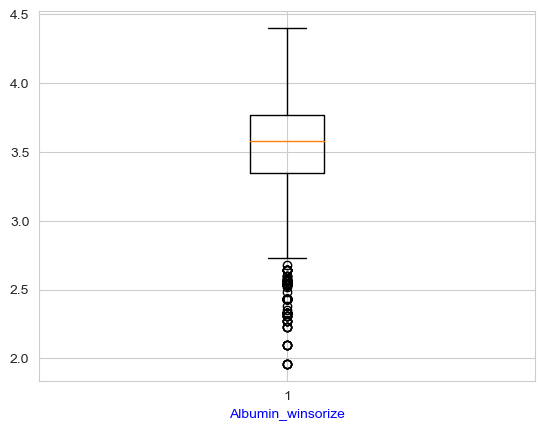

In [99]:
plt.boxplot(Albumin_winsorize)
plt.xlabel('Albumin_winsorize',color='b')
plt.show()

In [100]:
df_copy['Albumin_win'] = Albumin_winsorize

In [101]:
df_copy.drop([
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin'], axis=1, inplace=True)
df_copy.head()

,N_Days,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,Status,Bilirubin_win,Platelets_win,SGOT_win,Copper_Win,Cholesterol_win,Tryglicerides_win,Alk_Phos_win,Age_win,Prothrombin_win,Albumin_win
0,999,D-penicillamine,M,N,N,N,N,3.0000,D,2.3000,394.0000,179.8000,159.0000,316.0000,63.0000,1601.0000,21532,9.7000,3.3500
1,2574,Placebo,F,N,N,N,N,3.0000,C,0.9000,361.0000,134.8500,63.0000,364.0000,88.0000,1440.0000,19237,11.0000,3.5400
2,3428,Placebo,F,N,Y,Y,Y,4.0000,D,3.3000,199.0000,119.3500,131.0000,299.0000,50.0000,1029.0000,13727,11.7000,3.5500
3,2576,Placebo,F,N,N,N,N,3.0000,C,0.6000,269.0000,71.3000,58.0000,256.0000,96.0000,1653.0000,18460,10.7000,3.5000
4,788,Placebo,F,N,Y,N,N,4.0000,C,1.1000,298.0000,125.5500,63.0000,346.0000,96.0000,1181.0000,16658,10.6000,3.6500


In [102]:
new_numerical_col = df_copy[['Bilirubin_win', 'Platelets_win', 'SGOT_win', 'Copper_Win',
       'Cholesterol_win', 'Alk_Phos_win', 'Tryglicerides_win', 'Age_win',
       'Prothrombin_win', 'Albumin_win', 'Stage']]

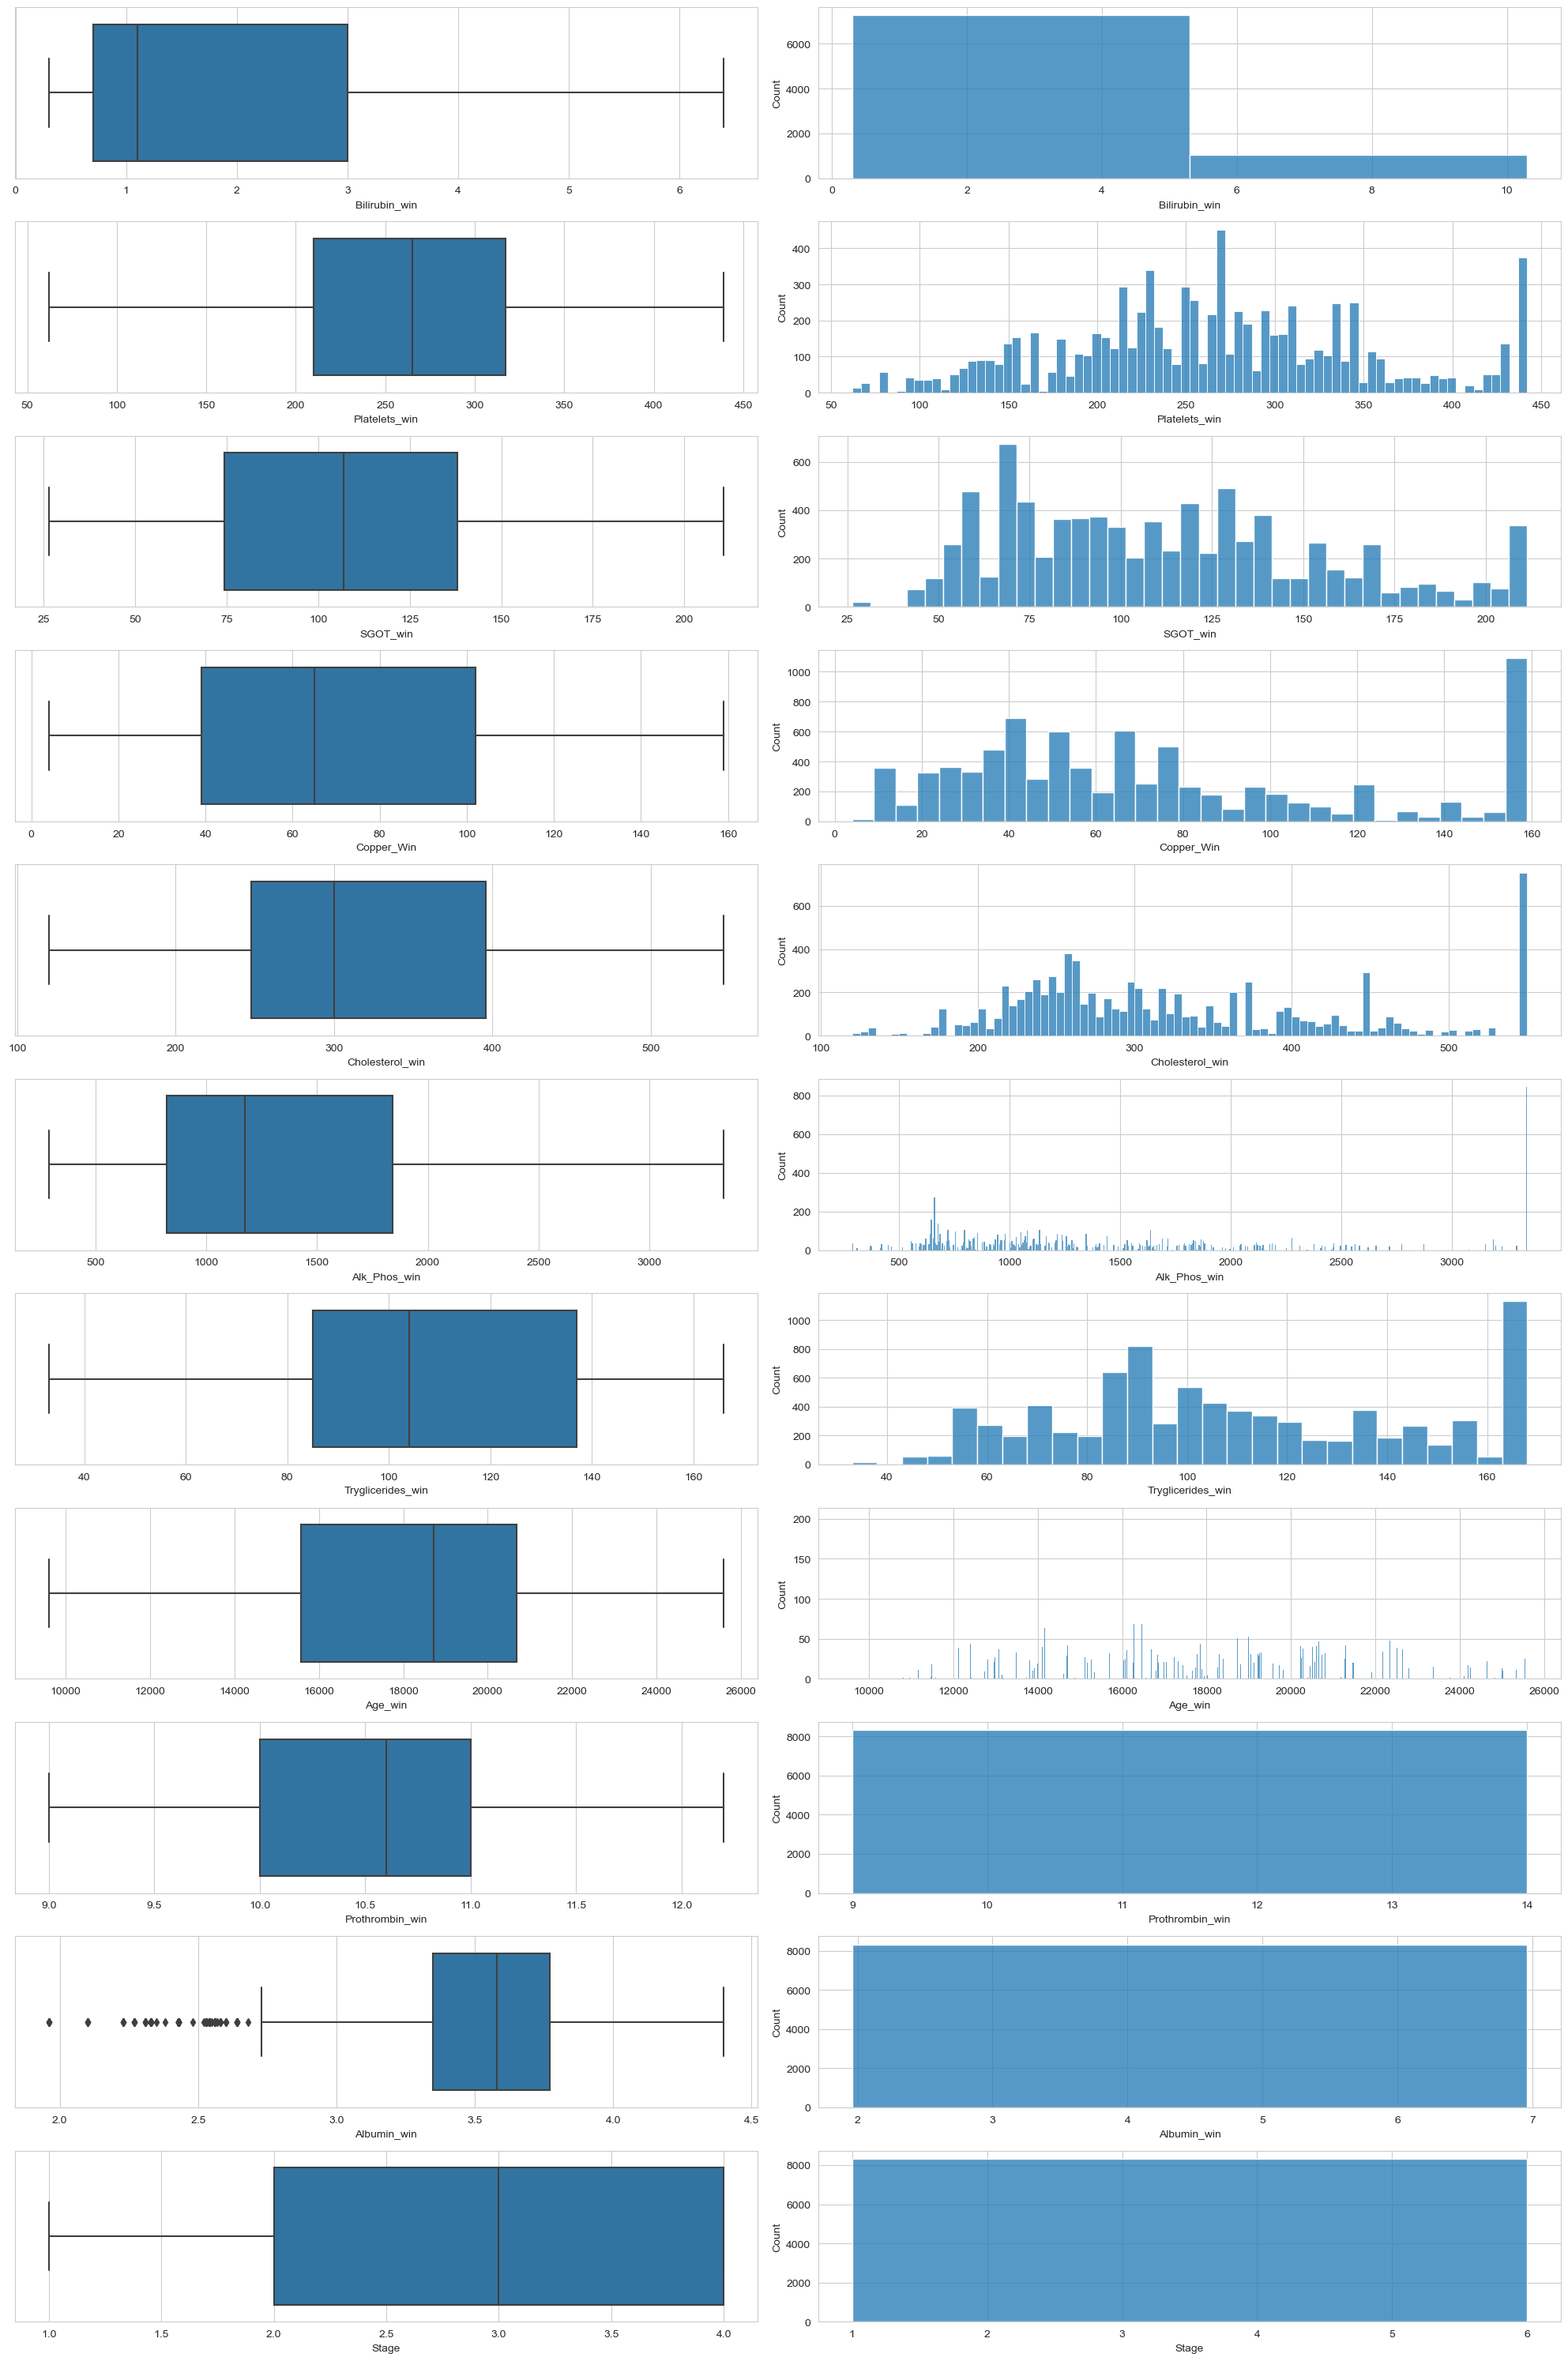

In [103]:
fig, axes = plt.subplots(11,2, figsize=(20,30))
a = 0;
b = 0;
count= new_numerical_col
for col in count:
    ax = sns.boxplot(x=df_copy[col], ax=axes[a][b])
    b += 1
    ax = sns.histplot(df_copy, x=col, binwidth = 5,ax=axes[a][b])
    a += 1
    b -= 1
plt.tight_layout()

In [104]:
unique_number = []
for i in df_copy.columns:
    x= df_copy[i].value_counts().count()
    unique_number.append(x)
df_copy_unique = pd.DataFrame(unique_number, columns=['Unique Number'], index = df_copy.columns)
df_copy_unique

,Unique Number
N_Days,495
Drug,2
Sex,2
Ascites,2
Hepatomegaly,2
Spiders,2
Edema,3
Stage,4
Status,3
Bilirubin_win,57


In [105]:
df_copy.head()

,N_Days,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,Status,Bilirubin_win,Platelets_win,SGOT_win,Copper_Win,Cholesterol_win,Tryglicerides_win,Alk_Phos_win,Age_win,Prothrombin_win,Albumin_win
0,999,D-penicillamine,M,N,N,N,N,3.0000,D,2.3000,394.0000,179.8000,159.0000,316.0000,63.0000,1601.0000,21532,9.7000,3.3500
1,2574,Placebo,F,N,N,N,N,3.0000,C,0.9000,361.0000,134.8500,63.0000,364.0000,88.0000,1440.0000,19237,11.0000,3.5400
2,3428,Placebo,F,N,Y,Y,Y,4.0000,D,3.3000,199.0000,119.3500,131.0000,299.0000,50.0000,1029.0000,13727,11.7000,3.5500
3,2576,Placebo,F,N,N,N,N,3.0000,C,0.6000,269.0000,71.3000,58.0000,256.0000,96.0000,1653.0000,18460,10.7000,3.5000
4,788,Placebo,F,N,Y,N,N,4.0000,C,1.1000,298.0000,125.5500,63.0000,346.0000,96.0000,1181.0000,16658,10.6000,3.6500


In [106]:
df.Stage.value_counts()

Stage
3.0000    3314
4.0000    2847
2.0000    1744
1.0000     418
Name: count, dtype: int64

In [107]:
testnumerical_col = [c for c in test.select_dtypes(exclude=['object']).columns if c !=target]
testcategorical_col = [c for c in test.select_dtypes(include=['object']).columns if c !=target]

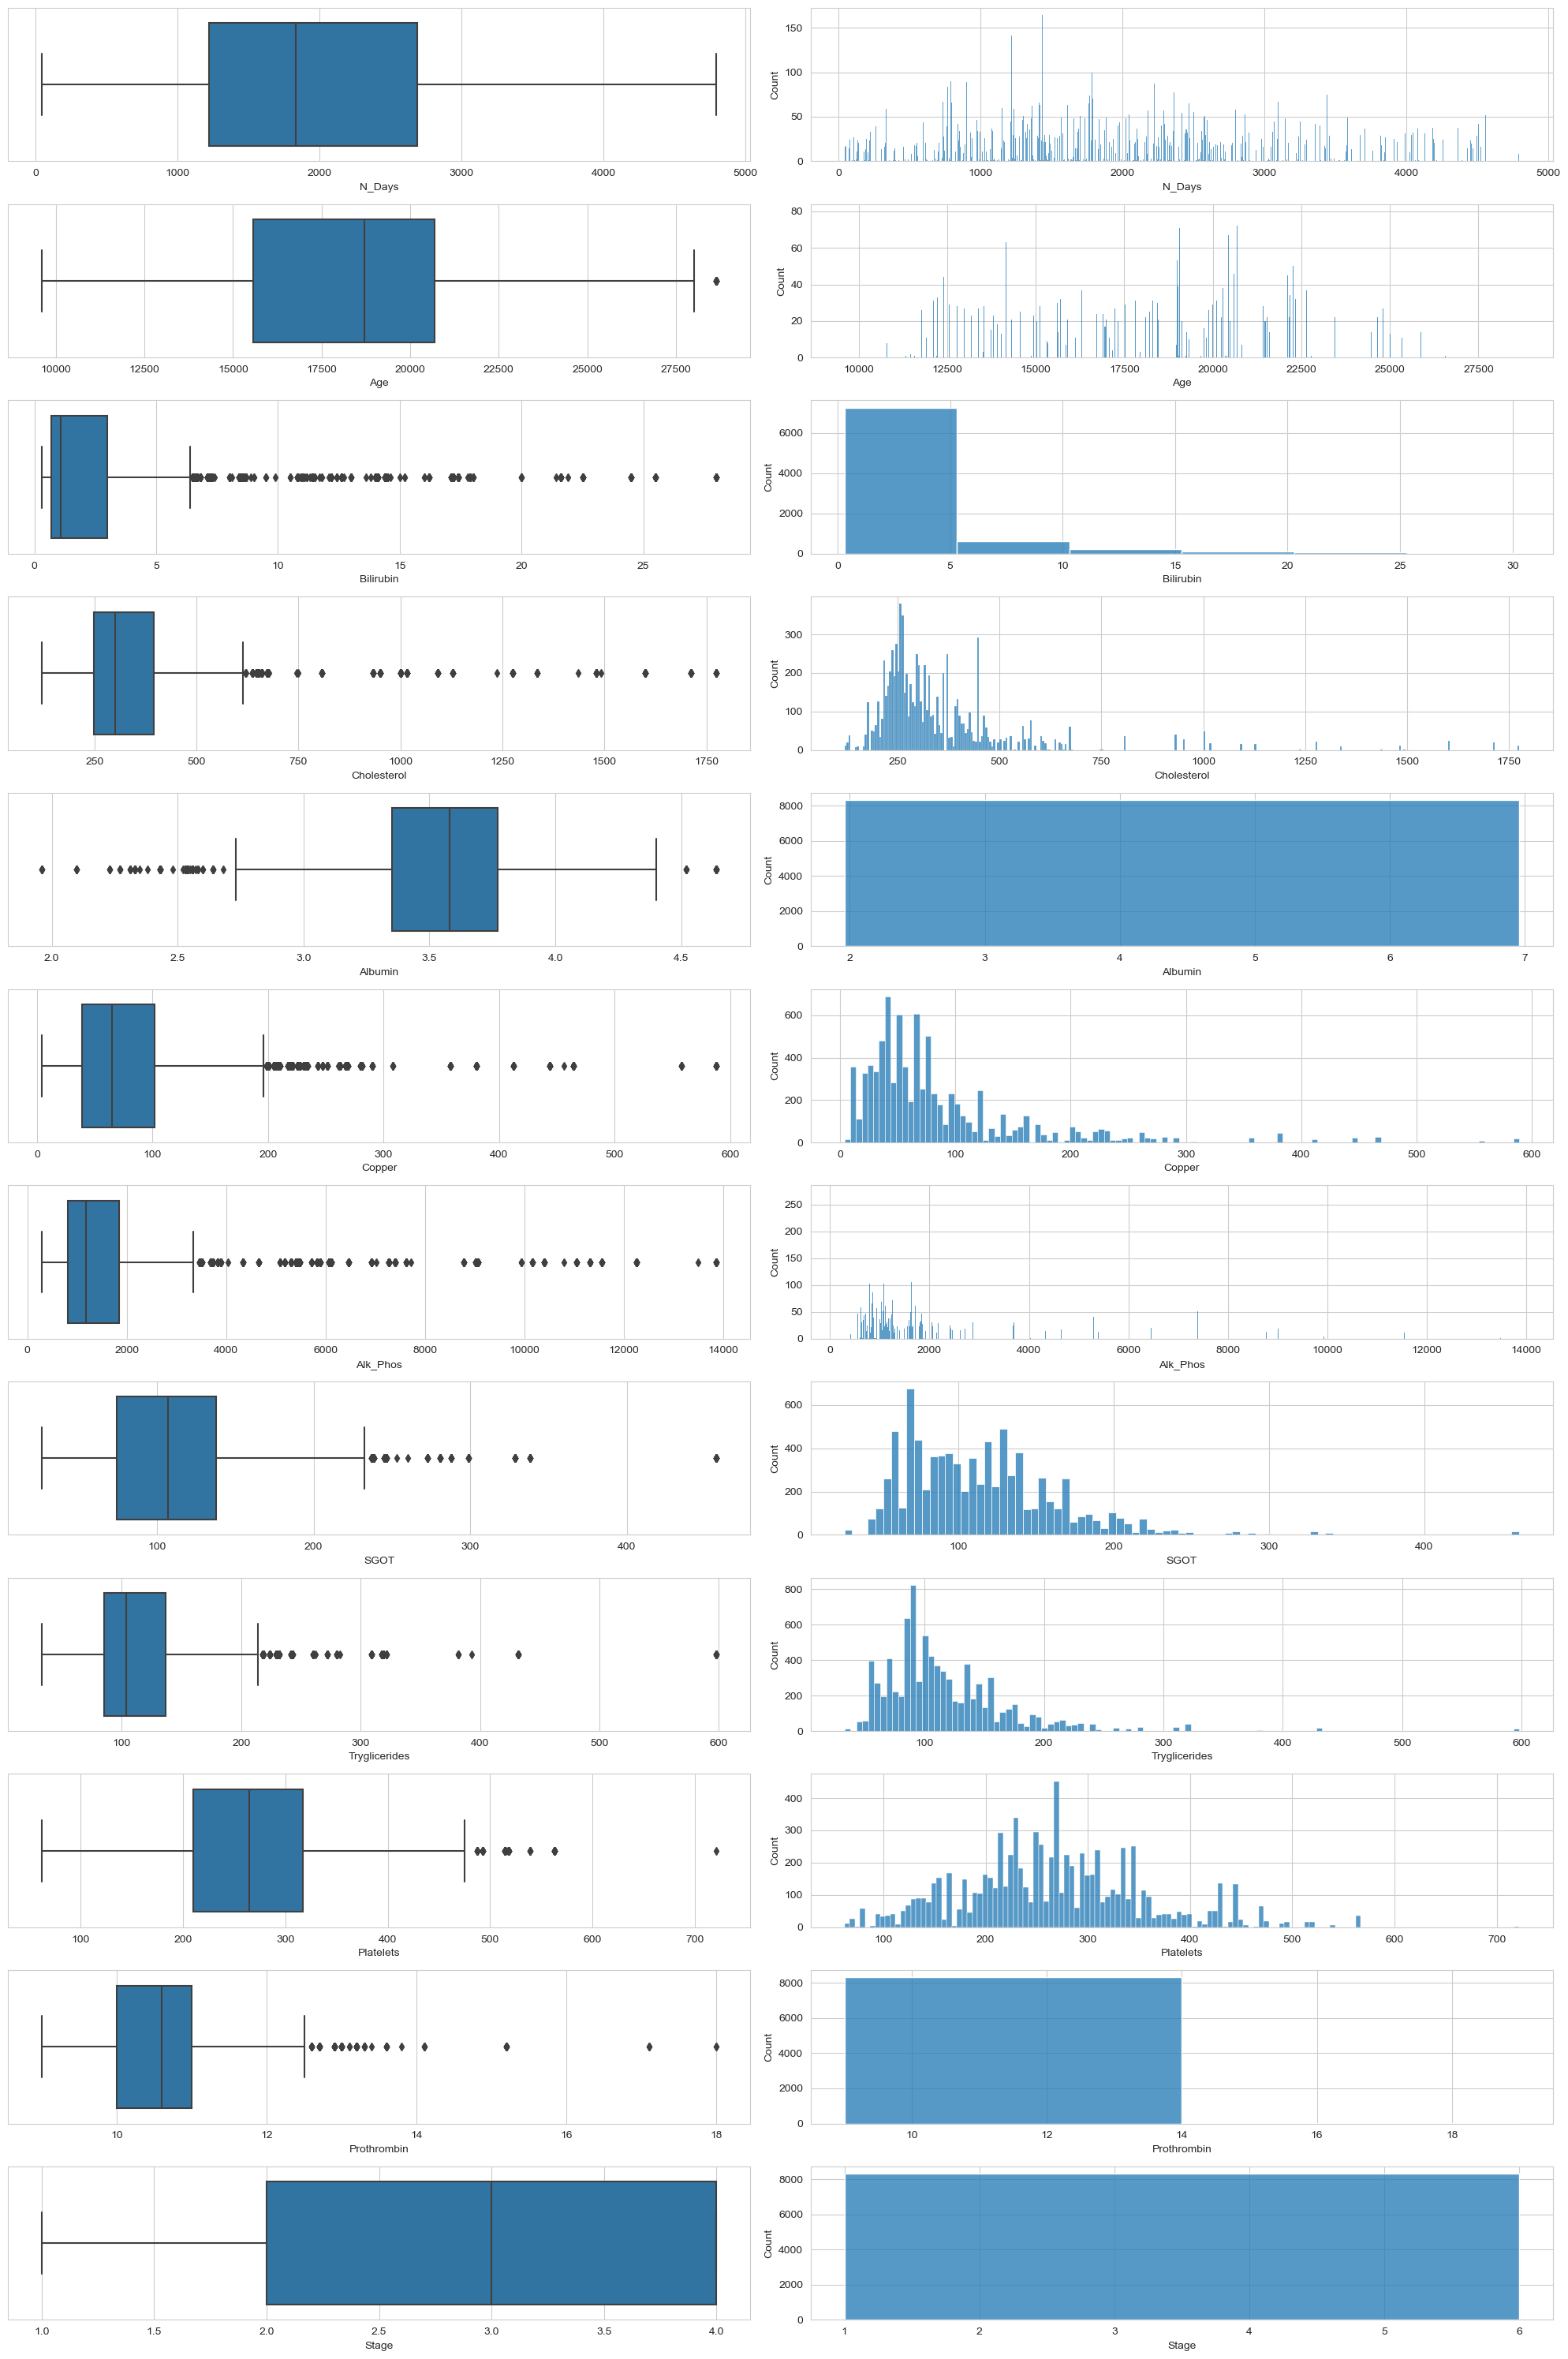

In [108]:
fig, axes = plt.subplots(12,2, figsize=(20,30))
a = 0;
b = 0;
count= testnumerical_col
for col in count:
    ax = sns.boxplot(x=df[col], ax=axes[a][b])
    b += 1
    ax = sns.histplot(df, x=col, binwidth = 5,ax=axes[a][b])
    a += 1
    b -= 1
plt.tight_layout()

In [109]:
test_copy=test.copy()

In [110]:
zscore_Bilirubin = zscore(test_copy['Bilirubin'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Bilirubin>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 518
--------------
Threshold Value: 2
Number of Outliers: 262
--------------
Threshold Value: 3
Number of Outliers: 168
--------------


In [111]:
test_copy[zscore_Bilirubin>1].Bilirubin.min()

6.5

In [112]:
test_copy[test_copy['Bilirubin']<6.5].Bilirubin.max()

6.4

In [113]:
winsorize_percentile_Bilirubin=stats.percentileofscore(test_copy['Bilirubin'],6.4)/100
print(winsorize_percentile_Bilirubin)

0.8965092012900778


In [114]:
1-winsorize_percentile_Bilirubin

0.10349079870992217

In [115]:
Bilirubin_winsorize=winsorize(test_copy.Bilirubin,(0, (1-winsorize_percentile_Bilirubin)))

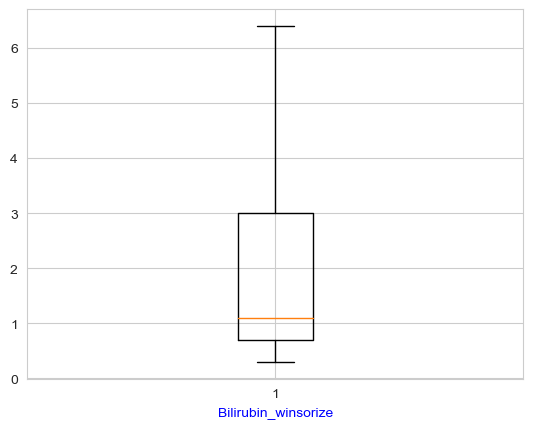

In [116]:
plt.boxplot(Bilirubin_winsorize)
plt.xlabel('Bilirubin_winsorize',color='b')
plt.show()

In [117]:
test_copy['Bilirubin_win'] = Bilirubin_winsorize

In [118]:
zscore_Platelets= zscore(test_copy['Platelets'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Platelets>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 702
--------------
Threshold Value: 2
Number of Outliers: 200
--------------
Threshold Value: 3
Number of Outliers: 30
--------------


In [119]:
test_copy[zscore_Platelets>2].Platelets.min()

442.0

In [120]:
test_copy[test_copy['Platelets']<442.0].Platelets.max()

438.0

In [121]:
winsorize_percentile_Platelets=stats.percentileofscore(test_copy['Platelets'],438)/100
print(winsorize_percentile_Platelets)

0.9600645038892052


In [122]:
1-winsorize_percentile_Platelets

0.03993549611079483

In [123]:
Platelets_winsorize=winsorize(test_copy.Platelets,(0, (1-winsorize_percentile_Platelets)))

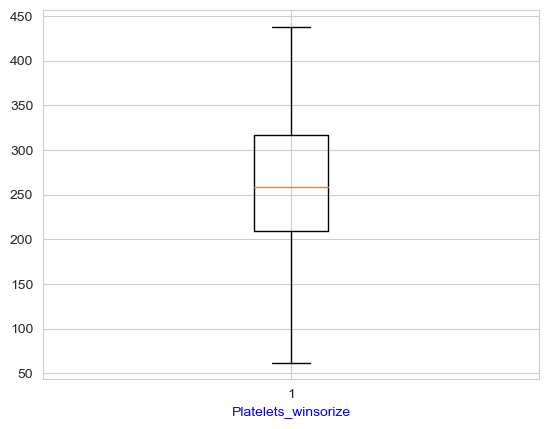

In [124]:
plt.boxplot(Platelets_winsorize)
plt.xlabel('Platelets_winsorize',color='b')
plt.show()

In [125]:
test_copy['Platelets_win'] = Platelets_winsorize

In [126]:
zscore_SGOT= zscore(test_copy['SGOT'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_SGOT>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 737
--------------
Threshold Value: 2
Number of Outliers: 168
--------------
Threshold Value: 3
Number of Outliers: 60
--------------


In [127]:
test_copy[zscore_SGOT>2].SGOT.min()

215.45

In [128]:
test_copy[test_copy['SGOT']<215.45].SGOT.max()

210.8

In [129]:
winsorize_percentile_SGOT=stats.percentileofscore(test_copy['SGOT'],210.8)/100
print(winsorize_percentile_SGOT)

0.9668943274520965


In [130]:
1-winsorize_percentile_SGOT

0.03310567254790353

In [131]:
SGOT_winsorize=winsorize(test_copy.SGOT,(0, (1-winsorize_percentile_SGOT)))

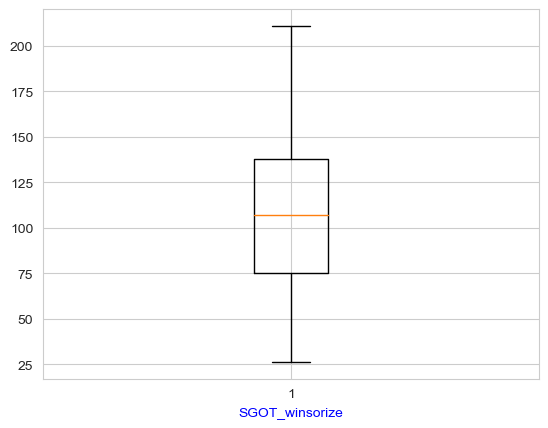

In [132]:
plt.boxplot(SGOT_winsorize)
plt.xlabel('SGOT_winsorize',color='b')
plt.show()

In [133]:
test_copy['SGOT_win'] = SGOT_winsorize

In [134]:
zscore_Copper= zscore(test_copy['Copper'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Copper>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 564
--------------
Threshold Value: 2
Number of Outliers: 210
--------------
Threshold Value: 3
Number of Outliers: 96
--------------


In [135]:
test_copy[zscore_Copper>1].Copper.min()

172.0

In [136]:
test_copy[test_copy['Copper']<161].Copper.max()

159.0

In [137]:
winsorize_percentile_Copper=stats.percentileofscore(test_copy['Copper'],159)/100
print(winsorize_percentile_Copper)

0.8835135647884652


In [138]:
1-winsorize_percentile_Copper

0.11648643521153479

In [139]:
Copper_winsorize=winsorize(test_copy.Copper,(0, (1-winsorize_percentile_Copper)))

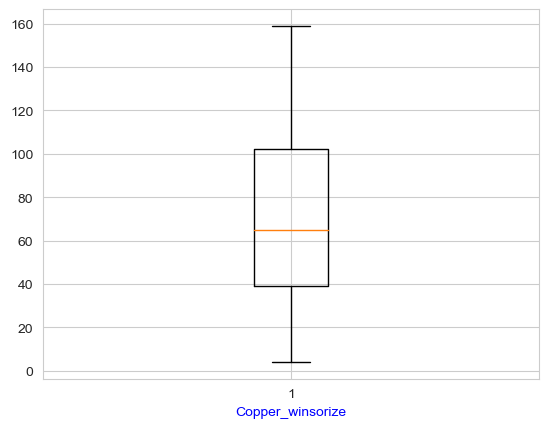

In [140]:
plt.boxplot(Copper_winsorize)
plt.xlabel('Copper_winsorize',color='b')
plt.show()

In [141]:
test_copy['Copper_Win'] = Copper_winsorize

In [142]:
zscore_Cholesterol= zscore(test_copy['Cholesterol'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Cholesterol>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 471
--------------
Threshold Value: 2
Number of Outliers: 201
--------------
Threshold Value: 3
Number of Outliers: 135
--------------


In [143]:
test_copy[zscore_Cholesterol>1].Cholesterol.min()

556.0

In [144]:
test_copy[test_copy['Cholesterol']<556].Cholesterol.max()

546.0

In [145]:
winsorize_percentile_Cholesterol=stats.percentileofscore(test_copy['Cholesterol'],546)/100
print(winsorize_percentile_Cholesterol)

0.9097894137734776


In [146]:
1-winsorize_percentile_Cholesterol

0.09021058622652245

In [147]:
Cholesterol_winsorize=winsorize(test_copy.Cholesterol,(0, (1-winsorize_percentile_Cholesterol)))

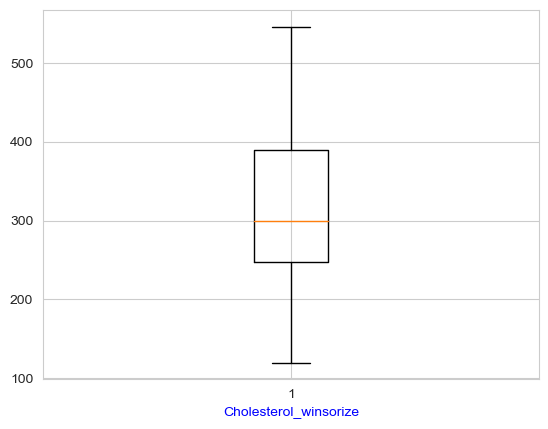

In [148]:
plt.boxplot(Cholesterol_winsorize)
plt.xlabel('Cholesterol_winsorize',color='b')
plt.show()

In [149]:
test_copy['Cholesterol_win'] = Cholesterol_winsorize

In [150]:
zscore_Tryglicerides= zscore(test_copy['Tryglicerides'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Tryglicerides>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 663
--------------
Threshold Value: 2
Number of Outliers: 189
--------------
Threshold Value: 3
Number of Outliers: 69
--------------


In [151]:
test_copy[zscore_Tryglicerides>1].Tryglicerides.min()

168.0

In [152]:
test_copy[test_copy['Tryglicerides']<168].Tryglicerides.max()

166.0

In [153]:
winsorize_percentile_Tryglicerides=stats.percentileofscore(test_copy['Tryglicerides'],166)/100
print(winsorize_percentile_Tryglicerides)

0.8702333523050655


In [154]:
1-winsorize_percentile_Tryglicerides

0.1297666476949345

In [155]:
Tryglicerides_winsorize=winsorize(test_copy.Tryglicerides,(0, (1-winsorize_percentile_Tryglicerides)))

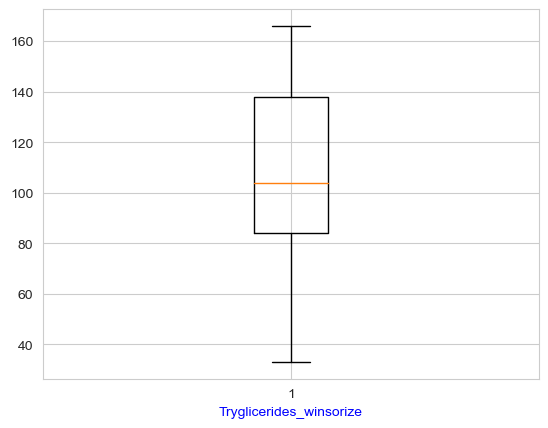

In [156]:
plt.boxplot(Tryglicerides_winsorize)
plt.xlabel('Tryglicerides_winsorize',color='b')
plt.show()

In [157]:
test_copy['Tryglicerides_win'] = Tryglicerides_winsorize

In [158]:
zscore_Alk_Phos= zscore(test_copy['Alk_Phos'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Alk_Phos>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 458
--------------
Threshold Value: 2
Number of Outliers: 303
--------------
Threshold Value: 3
Number of Outliers: 128
--------------


In [159]:
test_copy[zscore_Alk_Phos>1].Alk_Phos.min()

3836.0

In [160]:
test_copy[test_copy['Alk_Phos']<3836].Alk_Phos.max()

3740.0

In [161]:
winsorize_percentile_Alk_Phos=stats.percentileofscore(test_copy['Alk_Phos'],3320)/100
print(winsorize_percentile_Alk_Phos)

0.8937583001328022


In [162]:
Alk_Phos_winsorize=winsorize(test_copy.Alk_Phos,(0, (1-winsorize_percentile_Alk_Phos)))

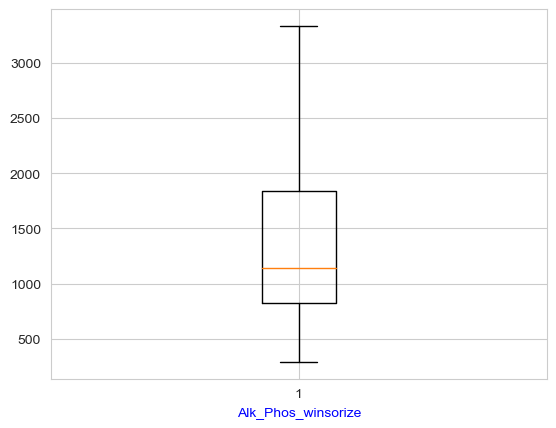

In [163]:
plt.boxplot(Alk_Phos_winsorize)
plt.xlabel('Alk_Phos_winsorize',color='b')
plt.show()

In [164]:
test_copy['Alk_Phos_win'] = Alk_Phos_winsorize

In [165]:
zscore_Age= zscore(test_copy['Age'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Age>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 943
--------------
Threshold Value: 2
Number of Outliers: 105
--------------
Threshold Value: 3
Number of Outliers: 0
--------------


In [166]:
test_copy[zscore_Age>2].Age.min()

25772

In [167]:
test_copy[test_copy['Age']<25772].Age.max()

25594

In [168]:
winsorize_percentile_Age=stats.percentileofscore(test_copy['Age'],25594)/100
print(winsorize_percentile_Age)

0.9794156706507304


In [169]:
Age_winsorize=winsorize(test_copy.Age,(0, (1-winsorize_percentile_Age)))

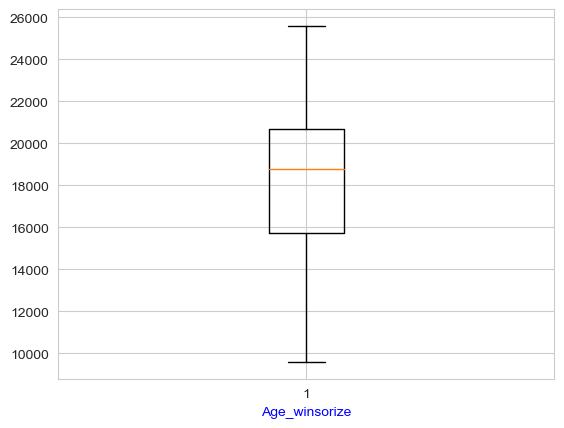

In [170]:
plt.boxplot(Age_winsorize)
plt.xlabel('Age_winsorize',color='b')
plt.show()

In [171]:
test_copy['Age_win'] = Age_winsorize

In [172]:
zscore_Prothrombin= zscore(test_copy['Prothrombin'])
for threshold in range(1,4): 
    print('Threshold Value: {}' .format(threshold))
    print('Number of Outliers: {}'.format(len(np.where(zscore_Prothrombin>threshold)[0])))
    print('--------------')

Threshold Value: 1
Number of Outliers: 756
--------------
Threshold Value: 2
Number of Outliers: 218
--------------
Threshold Value: 3
Number of Outliers: 51
--------------


In [173]:
test_copy[zscore_Prothrombin>2].Prothrombin.min()

12.3

In [174]:
test_copy[test_copy['Prothrombin']<12.3].Prothrombin.max()

12.2

In [175]:
winsorize_percentile_Prothrombin=stats.percentileofscore(test_copy['Prothrombin'],12.2)/100
print(winsorize_percentile_Prothrombin)

0.9562701574653767


In [176]:
Prothrombin_winsorize=winsorize(test_copy.Prothrombin,(0, (1-winsorize_percentile_Prothrombin)))

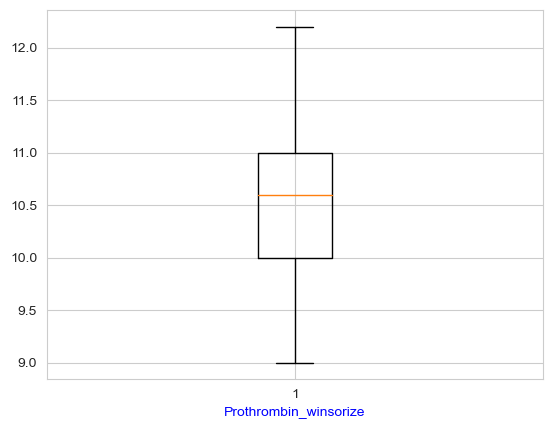

In [177]:
plt.boxplot(Prothrombin_winsorize)
plt.xlabel('Prothrombin_winsorize',color='b')
plt.show()

In [178]:
test_copy['Prothrombin_win'] = Prothrombin_winsorize

In [179]:
def iqr(df,var):
    q1 = np.quantile(df[var], 0.25)
    q3 = np.quantile(df[var], 0.75)
    diff = q3-q1
    lower_v=q1-(1.5*diff)
    upper_v=q3+(1.5*diff)
    return df[(df[var]<lower_v) | (df[var]>upper_v)]

In [180]:
Albumin_out = iqr(test_copy,'Albumin')
Albumin_out

,N_Days,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,...,Stage,Bilirubin_win,Platelets_win,SGOT_win,Copper_Win,Cholesterol_win,Tryglicerides_win,Alk_Phos_win,Age_win,Prothrombin_win
8,41,D-penicillamine,24064,F,Y,Y,N,N,17.9000,178.0000,...,4.0000,6.4000,62.0000,210.8000,159.0000,178.0000,166.0000,705.0000,24064,12.2000
17,110,Placebo,22173,F,N,Y,Y,Y,2.8000,302.0000,...,4.0000,2.8000,401.0000,92.0000,36.0000,302.0000,114.0000,614.0000,22173,12.2000
36,1084,Placebo,18460,F,N,Y,N,N,5.2000,1712.0000,...,4.0000,5.2000,297.0000,142.0000,159.0000,546.0000,128.0000,976.0000,18460,10.0000
54,769,D-penicillamine,19025,F,N,N,N,N,0.7000,274.0000,...,3.0000,0.7000,273.0000,117.8000,159.0000,274.0000,128.0000,1533.0000,19025,10.5000
115,1170,D-penicillamine,22767,F,N,Y,N,N,0.7000,556.0000,...,3.0000,0.7000,330.0000,127.1000,102.0000,546.0000,114.0000,1260.0000,22767,9.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5116,786,Placebo,24650,F,N,Y,Y,S,2.0000,227.0000,...,3.0000,2.0000,81.0000,130.2000,159.0000,227.0000,91.0000,933.0000,24650,12.0000
5121,304,D-penicillamine,21600,F,Y,Y,Y,Y,7.3000,243.0000,...,4.0000,6.4000,145.0000,155.0000,123.0000,243.0000,155.0000,591.0000,21600,11.5000
5183,3577,D-penicillamine,11485,F,N,N,N,N,0.4000,320.0000,...,2.0000,0.4000,251.0000,82.1500,48.0000,320.0000,80.0000,1083.0000,11485,9.8000
5185,2105,D-penicillamine,15105,F,N,Y,N,N,1.9000,252.0000,...,4.0000,1.9000,231.0000,108.5000,75.0000,252.0000,55.0000,1395.0000,15105,10.2000


In [181]:
test_copy[test_copy['Albumin']<4.520].Albumin.max()

4.43

In [182]:
winsorize_percentile_Albumin=stats.percentileofscore(test_copy['Albumin'],4.43)/100
print(winsorize_percentile_Albumin)

0.9979131094668944


In [183]:
Albumin_winsorize=winsorize(test_copy.Albumin,(0, (1-winsorize_percentile_Albumin)))

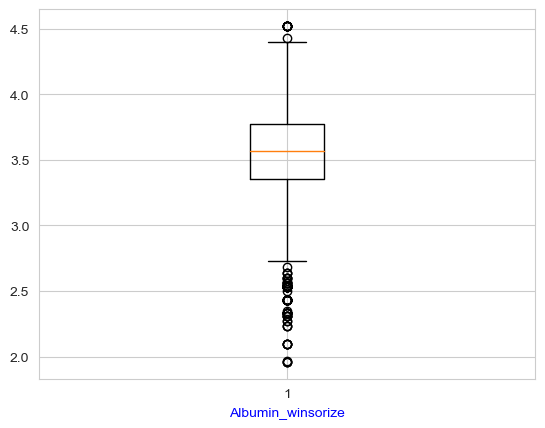

In [184]:
plt.boxplot(Albumin_winsorize)
plt.xlabel('Albumin_winsorize',color='b')
plt.show()

In [185]:
test_copy['Albumin_win'] = Albumin_winsorize

In [186]:
test_copy.drop([
 'Age',
 'Bilirubin',
 'Cholesterol',
 'Albumin',
 'Copper',
 'Alk_Phos',
 'SGOT',
 'Tryglicerides',
 'Platelets',
 'Prothrombin'], axis=1, inplace=True)
test_copy.head()

,N_Days,Drug,Sex,Ascites,Hepatomegaly,Spiders,Edema,Stage,Bilirubin_win,Platelets_win,SGOT_win,Copper_Win,Cholesterol_win,Tryglicerides_win,Alk_Phos_win,Age_win,Prothrombin_win,Albumin_win
0,3839,D-penicillamine,F,N,Y,N,N,2.0000,1.2000,430.0000,151.9000,65.0000,546.0000,90.0000,1636.0000,19724,10.6000,3.3700
1,2468,D-penicillamine,F,N,N,N,N,2.0000,1.1000,227.0000,151.9000,94.0000,546.0000,155.0000,1257.0000,14975,10.0000,4.2200
2,51,Placebo,F,N,Y,N,Y,4.0000,2.0000,213.0000,69.7500,46.0000,151.0000,101.0000,961.0000,13149,12.2000,2.9600
3,2330,D-penicillamine,F,N,N,N,N,2.0000,0.6000,270.0000,125.5500,40.0000,293.0000,56.0000,554.0000,20510,10.6000,3.8500
4,1615,D-penicillamine,F,N,Y,N,N,1.0000,1.4000,221.0000,125.0000,121.0000,277.0000,126.0000,1110.0000,21904,9.8000,2.9700


# Modelling

In [187]:
# Assuming 'df_copy' contains your dataset and 'target_column' is your target variable
X = df_copy.drop(columns=['Status'])
y = df_copy['Status']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine the features of the entire dataset before splitting
X_combined = pd.concat([X_train, X_test], axis=0)

# Combine the target variable of the entire dataset before splitting
y_combined = pd.concat([y_train, y_test], axis=0)

# Use OrdinalEncoder for categorical columns in independent variables
ordinal = OrdinalEncoder()
X_combined_encoded = ordinal.fit_transform(X_combined)

# Split the combined dataset back into training and testing sets
X_train_encoded = X_combined_encoded[:len(X_train)]
X_test_encoded = X_combined_encoded[len(X_train):]

# Use LabelEncoder for encoding the target variable
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Use MinMaxScaler for scaling
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train_encoded)
X_test_scaled = scaler.transform(X_test_encoded)

# Convert 'EDEMA' column into dummy variables
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)  # Convert back to DataFrame
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)  # Convert back to DataFrame

X_train_scaled = pd.get_dummies(X_train_scaled, columns=['Edema'], dtype=float, drop_first=True)
X_test_scaled = pd.get_dummies(X_test_scaled, columns=['Edema'], dtype=float, drop_first=True)


In [188]:


# Assuming X_train_scaled and y_train_encoded are your training features and labels
# Assuming X_test_scaled and y_test_encoded are your testing features and labels

# Define models
models = {
    'DecisionTree': DecisionTreeClassifier(),
    'RandomForest': RandomForestClassifier(),
    'LogisticRegression': LogisticRegression(),
    'XGBoost': XGBClassifier(), 
    'LightGBM': LGBMClassifier(),
    'CatBoost': CatBoostClassifier(logging_level='Silent')  # Set logging_level to avoid CatBoost verbosity
}

# Define evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'f1': make_scorer(f1_score),
    'log_loss': make_scorer(log_loss, needs_proba=True)
}

# Evaluate models using cross-validation
results = {}

for model_name, model in models.items():
    print(f"Evaluating {model_name}...")
    scores = cross_val_score(model, X_train_scaled, y_train_encoded, cv=5, n_jobs=-1, scoring='neg_log_loss')
    
    results[model_name] = {
        'Accuracy': scores[0].mean(),
        'F1 Score': scores[1].mean(),
        'Log Loss': -scores[2].mean()  # Convert log_loss to positive for ranking
    }

# Create a summary table
summary_table = pd.DataFrame(results).transpose().sort_values(by='Log Loss')

# Display the summary table
print("\nSummary Table:")
print(summary_table)

# Train the best model on the full training set (you can choose the best based on your criteria)
best_model_name = summary_table.index[0]
best_model = models[best_model_name]
best_model.fit(X_train_scaled, y_train_encoded)

# Make predictions on the testing set
y_pred = best_model.predict(X_test_scaled)
y_pred_proba = best_model.predict_proba(X_test_scaled)

# Evaluate the best model on the testing set
accuracy = accuracy_score(y_test_encoded, y_pred)
f1 = f1_score(y_test_encoded, y_pred, average='weighted')
logloss = -log_loss(y_test_encoded, y_pred_proba)

print(f"\nBest Model ({best_model_name}) Evaluation on Testing Set:")
print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"Log Loss: {logloss:.4f}")


Evaluating DecisionTree...
Evaluating RandomForest...
Evaluating LogisticRegression...
Evaluating XGBoost...
Evaluating LightGBM...
Evaluating CatBoost...

Summary Table:
                    Accuracy  F1 Score  Log Loss
LightGBM             -0.4620   -0.4689    0.4595
CatBoost             -0.4480   -0.4570    0.4656
RandomForest         -0.5452   -0.5226    0.5029
XGBoost              -0.5031   -0.5193    0.5044
LogisticRegression   -0.5080   -0.5070    0.5121
DecisionTree         -8.9839   -9.6603    9.6609
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000451 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1736
[LightGBM] [Info] Number of data points in the train set: 6658, number of used features: 19
[LightGBM] [Info] Start training from score -0.474399
[LightGBM] [Info] Start training from score -3.310513
[LightGBM] [Info] Start tr

In [189]:
import optuna
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import log_loss
from sklearn.metrics import accuracy_score, f1_score

# Assuming X_train_scaled and y_train_encoded are your training features and labels

def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'max_depth':  trial.suggest_int('max_depth', 2,70),
        'objective': 'multiclass',
        'num_class': 3,
        'boosting_type': 'gbdt',
        'metric': 'multi_logloss',
        'num_leaves': trial.suggest_int('num_leaves', 2, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.001, 0.1),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.1, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.1, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 10),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
       
    }

    X_train, X_valid, y_train, y_valid = train_test_split(
        X_train_scaled, y_train_encoded, test_size=0.2, random_state=42
    )

    train_data = lgb.Dataset(X_train, label=y_train)
    valid_data = lgb.Dataset(X_valid, label=y_valid)

    if lgb.__version__ >= '3.0.0':
        model = lgb.train(params, train_data, valid_sets=[train_data, valid_data],
                          num_boost_round=1000)  # Use a large number of boosting rounds
    else:
        model = lgb.train(params, train_data, valid_sets=[train_data, valid_data],
                          num_boost_round=1000)  # Use a large number of boosting rounds

    y_pred_valid = model.predict(X_valid, num_iteration=model.best_iteration)
    score = log_loss(y_valid, y_pred_valid)

    return score

study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100, n_jobs=-1)

print('Number of finished trials:', len(study.trials))
print('Best trial:')
trial = study.best_trial

print('Value: {}'.format(trial.value))
print('Params: ')
for key, value in trial.params.items():
    print('{}: {}'.format(key, value))

# Train the final model on the entire training set with the best hyperparameters
best_params = trial.params
final_model = lgb.LGBMClassifier(**best_params)
final_model.fit(X_train_scaled, y_train_encoded)

# Generate predictions on the test set
final_predictions = final_model.predict(X_test_scaled)
final_proba_predictions = final_model.predict_proba(X_test_scaled)

# If needed, format predictions for submission
# ...

# Evaluation on the final test set
final_accuracy = accuracy_score(y_test_encoded, final_predictions)
final_f1 = f1_score(y_test_encoded, final_predictions, average='weighted')
final_logloss = -log_loss(y_test_encoded, final_proba_predictions)

print(f"\nFinal Model Evaluation on Testing Set:")
print(f"Accuracy: {final_accuracy:.4f}")
print(f"F1 Score: {final_f1:.4f}")
print(f"Log Loss: {final_logloss:.4f}")


[I 2024-01-05 18:01:48,398] A new study created in memory with name: no-name-5c63531d-46df-44d5-8ea7-c1c566249c80
[I 2024-01-05 18:01:53,269] Trial 3 finished with value: 0.45306936790984303 and parameters: {'n_estimators': 173, 'max_depth': 47, 'num_leaves': 72, 'learning_rate': 0.05884552428929847, 'feature_fraction': 0.5790949009216879, 'bagging_fraction': 0.5697142133691013, 'bagging_freq': 3, 'min_child_samples': 75}. Best is trial 3 with value: 0.45306936790984303.
[I 2024-01-05 18:01:54,362] Trial 2 finished with value: 0.4954914097576963 and parameters: {'n_estimators': 438, 'max_depth': 5, 'num_leaves': 73, 'learning_rate': 0.00470261465991897, 'feature_fraction': 0.8134374345749642, 'bagging_fraction': 0.3644491273753162, 'bagging_freq': 3, 'min_child_samples': 91}. Best is trial 3 with value: 0.45306936790984303.
[I 2024-01-05 18:02:03,185] Trial 5 finished with value: 0.5033810717191893 and parameters: {'n_estimators': 433, 'max_depth': 42, 'num_leaves': 33, 'learning_rate'

Number of finished trials: 100
Best trial:
Value: 0.438324964594247
Params: 
n_estimators: 221
max_depth: 61
num_leaves: 55
learning_rate: 0.02909736326428426
feature_fraction: 0.34591440098963877
bagging_fraction: 0.6257794564962292
bagging_freq: 1
min_child_samples: 67
[LightGBM] [Warning] feature_fraction is set=0.34591440098963877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34591440098963877
[LightGBM] [Warning] bagging_fraction is set=0.6257794564962292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6257794564962292
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.34591440098963877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34591440098963877
[LightGBM] [Warning] bagging_fraction is set=0.6257794564962292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6257794564962292
[LightGBM] [Wa

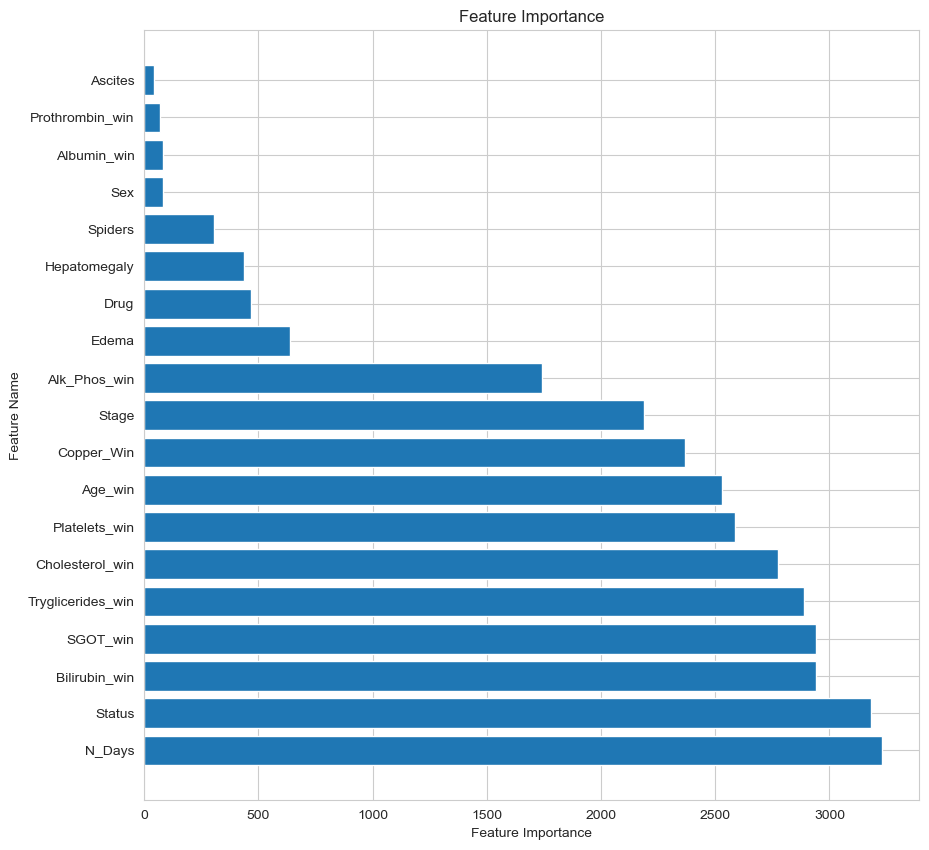

In [190]:

feature_importances = final_model.feature_importances_
feature_names = df_copy.columns 
feature_importance_dict = dict(zip(feature_names, feature_importances))
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)
sorted_feature_names, sorted_importance_scores = zip(*sorted_feature_importance)
plt.figure(figsize=(10, 10))

plt.barh(sorted_feature_names, sorted_importance_scores)
plt.xlabel("Feature Importance")
plt.ylabel("Feature Name")
plt.title("Feature Importance")
plt.show()

# Predicting on the provided test data

In [191]:
# Naming my test data to X_test
X_test = test_copy

# Use OrdinalEncoder for categorical columns in independent variables
ordinal = OrdinalEncoder()
X_test_encoded1 = ordinal.fit_transform(X_test)

# Use MinMaxScaler for scaling
X_test_scaled1 = scaler.transform(X_test_encoded1)

# Convert 'EDEMA' column into dummy variables
X_test_scaled1 = pd.DataFrame(X_test_scaled1, columns=X_test.columns)  # Convert back to DataFrame
X_test_scaled1 = pd.get_dummies(X_test_scaled1, columns=['Edema'],dtype=float, drop_first=True)

In [192]:
final_test_prediction = final_model.predict(X_test_scaled1)
final_test_proba_prediction = final_model.predict_proba(X_test_scaled1)

[LightGBM] [Warning] feature_fraction is set=0.34591440098963877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34591440098963877
[LightGBM] [Warning] bagging_fraction is set=0.6257794564962292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6257794564962292
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.34591440098963877, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.34591440098963877
[LightGBM] [Warning] bagging_fraction is set=0.6257794564962292, subsample=1.0 will be ignored. Current value: bagging_fraction=0.6257794564962292
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1


In [193]:

# Assuming 'external_test_predictions' is the predicted labels and 'external_test_proba_predictions' is the predicted probabilities

# Create a DataFrame with the required columns
submission = pd.DataFrame({
    'id': id,  # Assuming 'id' is a column in your external test data
    'Status_C': final_test_proba_prediction[:, 0],
    'Status_CL':final_test_proba_prediction [:, 1],
    'Status_D': final_test_proba_prediction[:, 2],
})

# Save the submission file
submission.to_csv('submission.csv', index=False)


In [194]:
submission.head()

,id,Status_C,Status_CL,Status_D
0,7905,0.7316,0.0257,0.2428
1,7906,0.7334,0.0816,0.1849
2,7907,0.0179,0.0119,0.9702
3,7908,0.9713,0.0049,0.0238
4,7909,0.7868,0.0722,0.1410
